# <b>Part III : Building a CNN

### <b>STEPS</b> :

#### 1. Load, preprocess, analyze, visualize the dataset and make it ready for training.

In [59]:
# Importing necessary libraries

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [60]:
# Defining dataset folder path

dataset_folder_path = 'D:\OneDrive - University at Buffalo\Semester #1 - Fall 2023\CSE 574 (D - 2239-23235) _ Introduction to Machine Learning (Alina Vereshchaka)\CSE 574 D - Assignments-n-Quizes\CSE 574 D - Assignment_2 (FINAL)\cnn_dataset'

In [61]:
# Creating empty lists to store images and labels

data_images = []
labels_images = []

In [62]:
# Looping through the sub-folders and loading images

for sub_folder_name in os.listdir(dataset_folder_path):
    sub_folder_path = os.path.join(dataset_folder_path, sub_folder_name)
    
    # Checking if it's a directory
    if os.path.isdir(sub_folder_path):
        label = sub_folder_name  # The folder name is the label (character)
        
        for image_file in os.listdir(sub_folder_path):
            image_path = os.path.join(sub_folder_path, image_file)
            
            # Load and process the image using PIL
            image = Image.open(image_path)
            image = image.convert("L")  # Converting to grayscale if needed
            image = np.array(image)  # Converting to a numpy array
            
            # Appending the image(s) and its label to the lists
            data_images.append(image)
            labels_images.append(label)

In [63]:
# Converting the image and label lists to numpy arrays for further processing

images = np.array(data_images)
labels = np.array(labels_images)

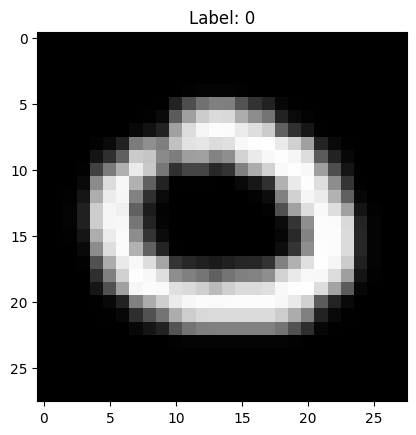

In [64]:
# Lets have a look to one of the images that were loaded
# in the previous steps - just to verify and confirm that we are good to go !

plt.imshow(images[69], cmap='gray')
plt.title(f"Label: {labels[69]}")
plt.show()

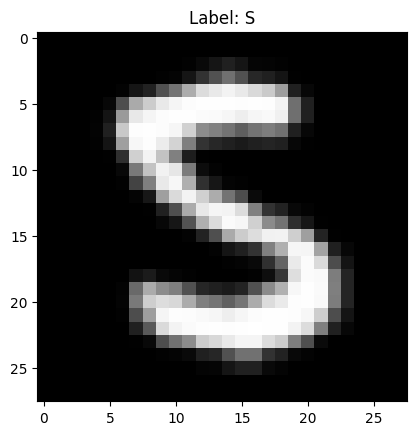

In [65]:
# Printing another image

plt.imshow(images[79000], cmap='gray')
plt.title(f"Label: {labels[79000]}")
plt.show()

In [66]:
# Let us print the shape of the lists

print(f"Data : {images.shape}")
print(f"Labels : {labels.shape}")

Data : (100800, 28, 28)
Labels : (100800,)


In [67]:
# Let's pre-process the data

# We will be using "Normalization" to pre-process our image data (also we need
# to take care that we don'y change the shape of the lists)

normalized_data_images = images / 255.0

# We need to have the labels for the normalized images
normalized_labels = labels

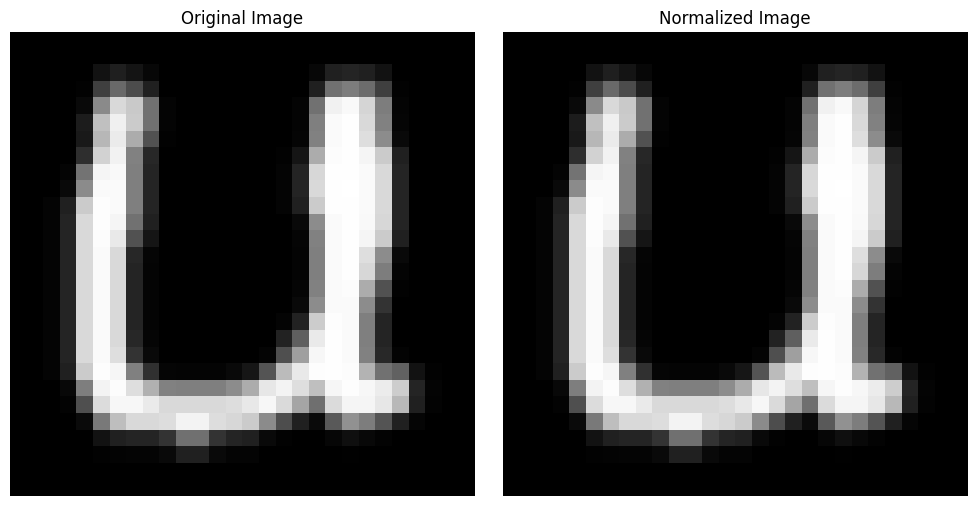

In [68]:
# I want to check whether the images are normalized or not
# by showing one of the images from the list

# Choosing an index to visualize a specific image
index_to_visualize = 86543

# Original image
original_image = images[index_to_visualize]

# Normalized image
normalized_image = normalized_data_images[index_to_visualize]

# Plotting both images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [69]:
# One thing we need to do here is One-Hot Encoding all the labels
# present

# The reason is - the CNN model won't be accepting characters as labels but rather
# numbers (to be specific - integers). Thus they are to to changed

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Fitting and transforming the labels to integer values
integer_labels = label_encoder.fit_transform(normalized_labels)

# Initializing the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [70]:
# Fitting and transforming the integer labels to one-hot encoding
one_hot_labels = one_hot_encoder.fit_transform(integer_labels.reshape(-1, 1))

C:\Users\dpsvn\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
# Lets check whether the labels have actually been encoded or not (we will only 
# consider the integer labels rather than One-Hot Encoded labels - to reduce 
# complexity)
# If we recall, the original labels list started with 0,1,2.... and so on it went

# Under every label they have 2800 images. So till 2800 X 10 = 28000 images
# I need not to check. Thus, I will pick up an index after that

integer_labels[40000]

14

In [72]:
# Lets analyze & visualize the dataset

'''
Data Summary Statistics - mean, standard deviation, and data distribution
'''

# Computing mean and standard deviation
mean = np.mean(normalized_data_images)
std = np.std(normalized_data_images)

print(f"Mean : {mean}")
print(f"Std (STANDARD DEVIATION) : {std}")

from scipy import stats

# Median
median = np.median(normalized_data_images)

# Mode
mode_result = stats.mode(normalized_data_images)
mode = mode_result.mode[0]

# Variance
variance = np.var(normalized_data_images)

# Range
data_range = np.ptp(normalized_data_images)

# Interquartile Range (IQR)
q1 = np.percentile(normalized_data_images, 25)
q3 = np.percentile(normalized_data_images, 75)
iqr = q3 - q1

print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Range: {data_range}")
print(f"IQR: {iqr}")


Mean : 0.17581578355548536
Std (STANDARD DEVIATION) : 0.33368075663902513


C:\Users\dpsvn\AppData\Local\Temp\ipykernel_34516\3670740609.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(normalized_data_images)


Median: 0.0
Mode: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0

In [73]:
# Data distribution - for integer-encoded labels

unique_labels, label_counts = np.unique(integer_labels, return_counts=True)
print(f"UNIQUE LABELS : {unique_labels}")
print(f"LABELS COUNTS : {label_counts}")

UNIQUE LABELS : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
LABELS COUNTS : [2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800
 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800 2800
 2800 2800 2800 2800 2800 2800 2800 2800]


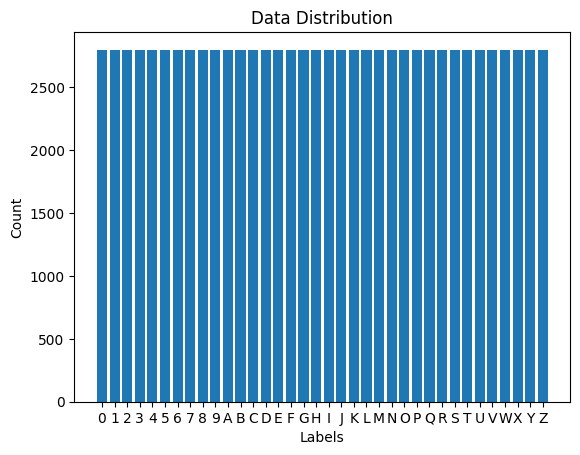

In [74]:
'''
Visualization - a bar chart showing the frequency of each class.
'''

# Plotting the data distribution
unique_labs_ori = np.unique(np.array(labels_images))
plt.bar(unique_labs_ori, label_counts)
plt.xlabel('Labels') # For the time being we are considering the original labels
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()

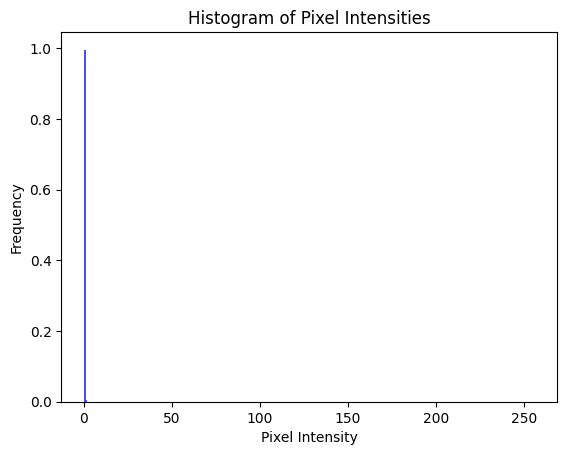

In [75]:
'''
Visualization - Histogram of Pixel Intensities
'''

plt.hist(normalized_data_images.flatten(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()

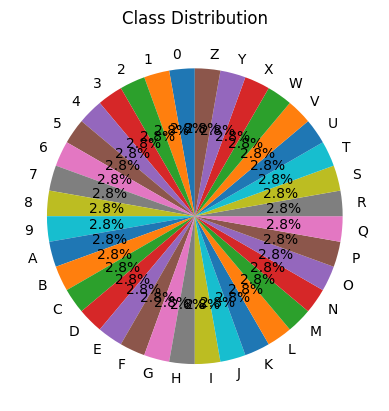

In [76]:
'''
Visualization - Class Distribution Chart
'''

plt.pie(label_counts, labels=unique_labs_ori, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

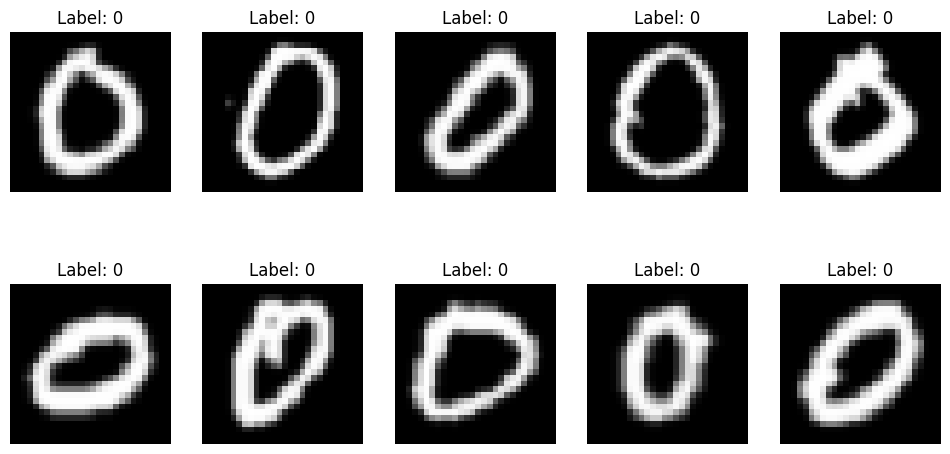

In [77]:
'''
Data Exploration - displaying mutiple images
'''

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(normalized_data_images[i], cmap='gray')
    ax.set_title(f"Label: {normalized_labels[i]}")
    ax.axis('off')
plt.show()

In [78]:
# Now that we are done with data loading, pre-processing, analysis
# and visualization - its time to divide the dataset
# into training, validation and testing dataset components 

from sklearn.model_selection import train_test_split

# Splitting the dataset into a combined training and testing set (90%) and a validation set (10%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(normalized_data_images, integer_labels, test_size=0.10, random_state=42)

# Further splitting the combined training and testing set into a training set (80%) and a validation set (10%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1111, random_state=42)

In [79]:
# Printing the sizes of the resulting sets

print("Training set size (X_train):", X_train.shape)
print("Validation set size (X_valid):", X_valid.shape)
print("Testing set size (X_test):", X_test.shape)
print("\n")
print("Training set size (y_train):", y_train.shape)
print("Validation set size (y_valid):", y_valid.shape)
print("Testing set size (y_test):", y_test.shape)

Training set size (X_train): (80641, 28, 28)
Validation set size (X_valid): (10079, 28, 28)
Testing set size (X_test): (10080, 28, 28)


Training set size (y_train): (80641,)
Validation set size (y_valid): (10079,)
Testing set size (y_test): (10080,)


##
2. Build and train a basic CNN (with max 10 hidden layers).<br>
Decide your CNN architecture:<br>
• How many input neurons are there?<br>
• How many output neurons are there?<br>
• What activation function is used for the hidden layers?<br>
<br>
Suggestion: try ReLU, ELU, Sigmoid<br>
<br>
• What activation function is used for the output layer?<br>
• What is the number of hidden layers?<br>
• What is the kernel size, number of filters, strides, paddings and other CNN-parameters?<br>
• Do you include Dropout?


##

3. Define your CNN architecture using PyTorch and return the summary of your model.

In [80]:
# Importing required libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [81]:
# Checking if a GPU (cuda) is available, and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"

# Printing the selected device
print("Selected device:", device)

Selected device: cpu


In [82]:
# Defining the CNN architecture

class SelfCNN(nn.Module):
    def __init__(self, num_classes):
        super(SelfCNN, self).__init__()
        
        # Defining the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Defining the fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)
        
        # Defining dropout layer to prevent overfitting
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        # First Convolutional Layer
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        
        # Second Convolutional Layer
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        
        # Flattening the feature maps to prepare for fully connected layers
        x = x.view(x.size(0), -1)  #
        
        # First Fully Connected Layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        # Output Layer
        x = self.fc2(x)
        
        return x


In [83]:
# Initializing the model

num_classes = 36
model = SelfCNN(num_classes)

In [84]:
# Printing the model summary

print(model)

SelfCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=36, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [85]:
# Printing the model summary - in a more specific manner

from torchsummary import summary

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 14, 14]          18,496
            Linear-3                  [-1, 128]         401,536
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 36]           4,644
Total params: 424,996
Trainable params: 424,996
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.29
Params size (MB): 1.62
Estimated Total Size (MB): 1.91
----------------------------------------------------------------


##
4. Train your model.
##
5. Add improvement methods that you tried for “Part III - Step 3” of this assignment, that are applicable to CNN architecture (e.g., earlystopping).

In [86]:
'''
IMPROVEMENT METHODS : EARLY STOPPING & LEARNING RATE SECHEDULER
'''

# The code components for both the improvement methods have been taken
# from PART - 2 of Assignment 2

# Importing the required libraries

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score

In [87]:
# Defining the dataset and dataloaders for training, validation, and testing

# The model shall only accept single channel, thus need to reshape
# accordingly
X_train = X_train.reshape(80641, 1, 28, 28)
X_valid = X_valid.reshape(10079, 1, 28, 28)
X_test = X_test.reshape(10080, 1, 28, 28)


train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
valid_dataset = TensorDataset(torch.from_numpy(X_valid).float(), torch.from_numpy(y_valid).float())
test_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [88]:
# Creating data loaders for training, validation and testing components

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [89]:
# Defining the model, loss function, and optimizer

model = SelfCNN(36)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [90]:
# Early stopping parameters

num_epochs = 200
patience = 200

In [91]:
# Learning rate scheduler

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

In [92]:
# Initializing variables to track the best model and validation loss

best_model = None
best_valid_loss = float('inf')

In [93]:
# Lists to store losses and accuracies

train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

In [94]:
# Initializing lists to store predicted and true labels for training and validation
train_predicted_labels = []
train_true_labels = []
validation_predicted_labels = []
validation_true_labels = []

# Starting the loops
for epoch in range(num_epochs):
    # Training loop
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_predicted_labels = []
    train_true_labels = []

    # Looping through batches in the training dataset
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clearing gradients
        outputs = model(inputs.float())  # Forward pass
        labels = labels.to(torch.int64)  # Converting labels to appropriate datatype
        loss = criterion(outputs, labels)  # Calculating loss
        loss.backward()  # Backward pass
        optimizer.step()  # Updating weights

        running_loss += loss.item()  # Accumulating the running loss

        _, predicted = torch.max(outputs.data, 1)  # Getting the index of the max log-probability
        total_train += labels.size(0)  # Incrementing total number of training samples
        correct_train += (predicted == labels).sum().item()  # Counting correct predictions

        # Storing predicted and true labels
        train_predicted_labels.extend(predicted.cpu().numpy())
        train_true_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)  # Calculating average training loss
    train_accuracy = 100 * correct_train / total_train  # Calculating training accuracy

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    validation_predicted_labels = []
    validation_true_labels = []

    with torch.no_grad():  # Disabling gradient computation during validation
        # Looping through batches in the validation dataset
        for inputs, labels in valid_loader:
            outputs = model(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

            # Storing predicted and true labels for later analysis
            validation_predicted_labels.extend(predicted.cpu().numpy())
            validation_true_labels.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(valid_loader)  # Calculating average validation loss
    valid_accuracy = 100 * correct_valid / total_valid  # Calculating validation accuracy

    # Printting current epoch's results
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Valid Acc: {valid_accuracy:.2f}%")

    # Storing losses and accuracies for later analysis
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    # Learning rate scheduler
    scheduler.step(valid_loss)

    # Checking if the current model has the best validation loss
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_model = model.state_dict()
    else:
        # Implementing early stopping if the validation loss increases for a certain number of epochs
        patience -= 1
        if patience == 0:
            print("Early stopping. Restoring the best model.")
            model.load_state_dict(best_model)
            break  # Break out of the loop if early stopping criteria met


Epoch 1/200 - Train Loss: 1.0498 - Valid Loss: 0.3985 - Train Acc: 67.13% - Valid Acc: 86.24%
Epoch 2/200 - Train Loss: 0.6082 - Valid Loss: 0.3596 - Train Acc: 79.62% - Valid Acc: 87.46%
Epoch 3/200 - Train Loss: 0.5261 - Valid Loss: 0.3104 - Train Acc: 82.17% - Valid Acc: 88.96%
Epoch 4/200 - Train Loss: 0.4742 - Valid Loss: 0.3001 - Train Acc: 83.88% - Valid Acc: 89.39%
Epoch 5/200 - Train Loss: 0.4411 - Valid Loss: 0.2860 - Train Acc: 84.71% - Valid Acc: 89.81%
Epoch 6/200 - Train Loss: 0.4126 - Valid Loss: 0.2825 - Train Acc: 85.44% - Valid Acc: 90.10%
Epoch 7/200 - Train Loss: 0.3913 - Valid Loss: 0.2712 - Train Acc: 86.20% - Valid Acc: 90.39%
Epoch 8/200 - Train Loss: 0.3710 - Valid Loss: 0.2772 - Train Acc: 86.90% - Valid Acc: 90.25%
Epoch 9/200 - Train Loss: 0.3566 - Valid Loss: 0.2836 - Train Acc: 87.01% - Valid Acc: 89.49%
Epoch 10/200 - Train Loss: 0.3414 - Valid Loss: 0.2719 - Train Acc: 87.51% - Valid Acc: 90.91%
Epoch 11/200 - Train Loss: 0.3270 - Valid Loss: 0.2693 - Tr

KeyboardInterrupt: 

## 
6. Evaluate the performance of the model on the testing data.<br> 
Suggested metrics:<br>
• Time to train (e.g. using time.time())<br>
• Accuracy<br>
• Precision, recall and F1 score<br>
<br>
Note: The expected accuracy on the testing dataset for this task is > 85%.

In [ ]:
# Importing the libraries

import time
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
# Lists to store testing losses and accuracies

test_losses = []
test_accuracies = []
precision, recall, f1, _ = [], [], [], []

In [ ]:
# Initializing lists to store predicted and true labels for the test set

test_predicted_labels = []
test_true_labels = []

for epoch in range(10):
    start_time = time.time()  # Recording the start time for performance tracking
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0
    test_predicted_labels = []  # Resetting lists for each epoch
    test_true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

            # Storing predicted and true labels for later analysis
            test_predicted_labels.extend(predicted.cpu().numpy())
            test_true_labels.extend(labels.cpu().numpy())

    test_loss = running_test_loss / len(test_loader)  # Calculating average test loss
    test_accuracy = 100 * correct_test / total_test  # Calculating test accuracy
    precision_epoch, recall_epoch, f1_epoch, _ = precision_recall_fscore_support(test_true_labels, test_predicted_labels, average='weighted')

    # Storing test metrics for later analysis
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    precision.append(precision_epoch)
    recall.append(recall_epoch)
    f1.append(f1_epoch)

    elapsed_time = time.time() - start_time  # Calculating elapsed time for the current epoch

    print(f"Epoch {epoch+1}/10 - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.2f}% - Precision: {precision_epoch:.4f} - Recall: {recall_epoch:.4f} - F1: {f1_epoch:.4f} - Time: {elapsed_time:.2f} seconds")


Epoch 1/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.35 seconds
Epoch 2/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.31 seconds
Epoch 3/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.15 seconds
Epoch 4/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.20 seconds
Epoch 5/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.21 seconds
Epoch 6/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.22 seconds
Epoch 7/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.30 seconds
Epoch 8/10 - Test Loss: 0.2547 - Test Acc: 90.41% - Precision: 0.9132 - Recall: 0.9041 - F1: 0.9027 - Time: 5.17 seconds
Epoch 9/10 - Test Loss: 0.2547 -

In [ ]:
# Printing the final results for the 10th epoch

print("Final Results:")
print(f"Test Loss: {test_losses[-1]:.4f}")
print(f"Test Accuracy: {test_accuracies[-1]:.2f}%")
print(f"Precision: {precision[-1]:.4f}")
print(f"Recall: {recall[-1]:.4f}")
print(f"F1 Score: {f1[-1]:.4f}")

Final Results:
Test Loss: 0.2547
Test Accuracy: 90.41%
Precision: 0.9132
Recall: 0.9041
F1 Score: 0.9027


##
7. Save the weights of the trained neural network.
Saving and loading models in PyTorch

In [ ]:
import h5py

# Saving the model's state dictionary to a .pt file
torch.save(model.state_dict(), 'soubhiks_shirisha_assignment2_part3.pt')

# Converting the .pt file to an .h5 file
pt_weights = torch.load('soubhiks_shirisha_assignment2_part3.pt')
with h5py.File('soubhiks_shirisha_assignment2_part3.h5', 'w') as f:
    for key in pt_weights:
        f.create_dataset(key, data=pt_weights[key].cpu().numpy())

##
8. Visualize the results. Include the following graphs:<br><br>
a. Confusion matrices<br>
b. ROC curve (receiver operating characteristic curve).<br>
c. A graph that compares test, validation and training accuracy on the same plot with a clear labeling<br>
d. A graph that compares test, validation and training loss on the same plot with a clear labeling<br>

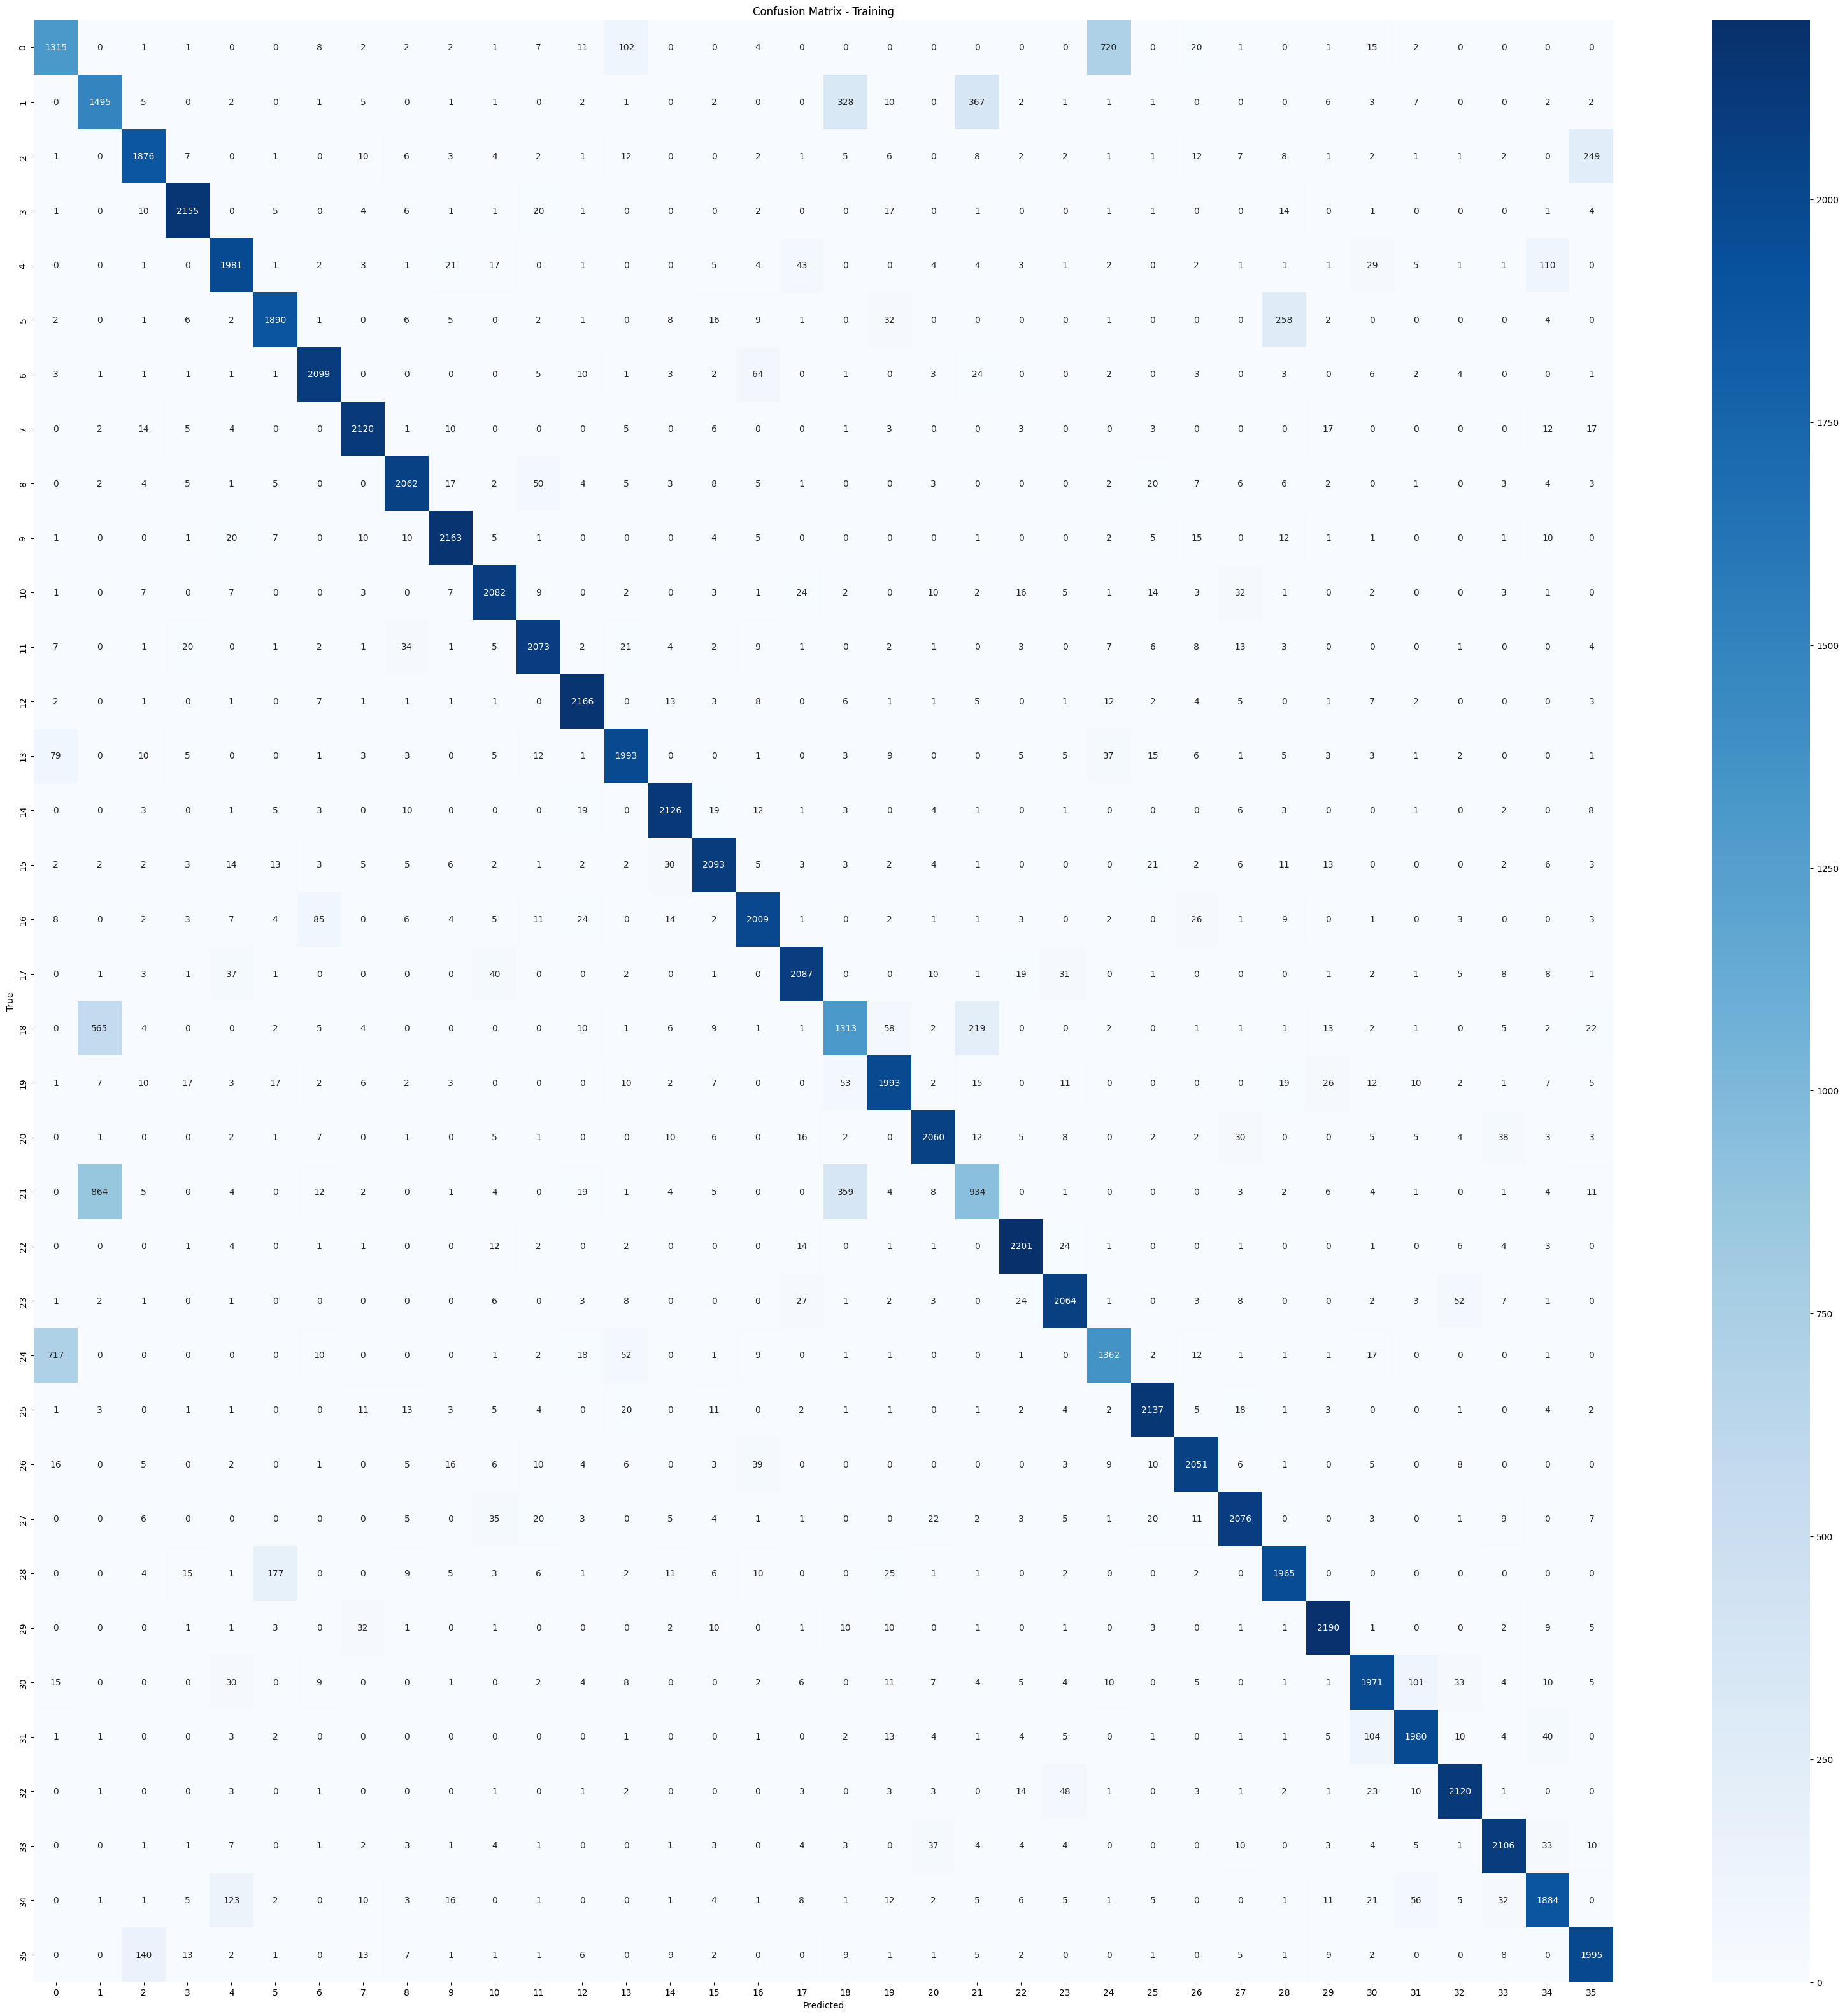

In [ ]:
from sklearn.metrics import confusion_matrix

'''
CONFUSION MATRIX - TRAINING COMPONENT
'''

# Calculating the confusion matrix
cm = confusion_matrix(train_true_labels, train_predicted_labels)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training')
plt.show()

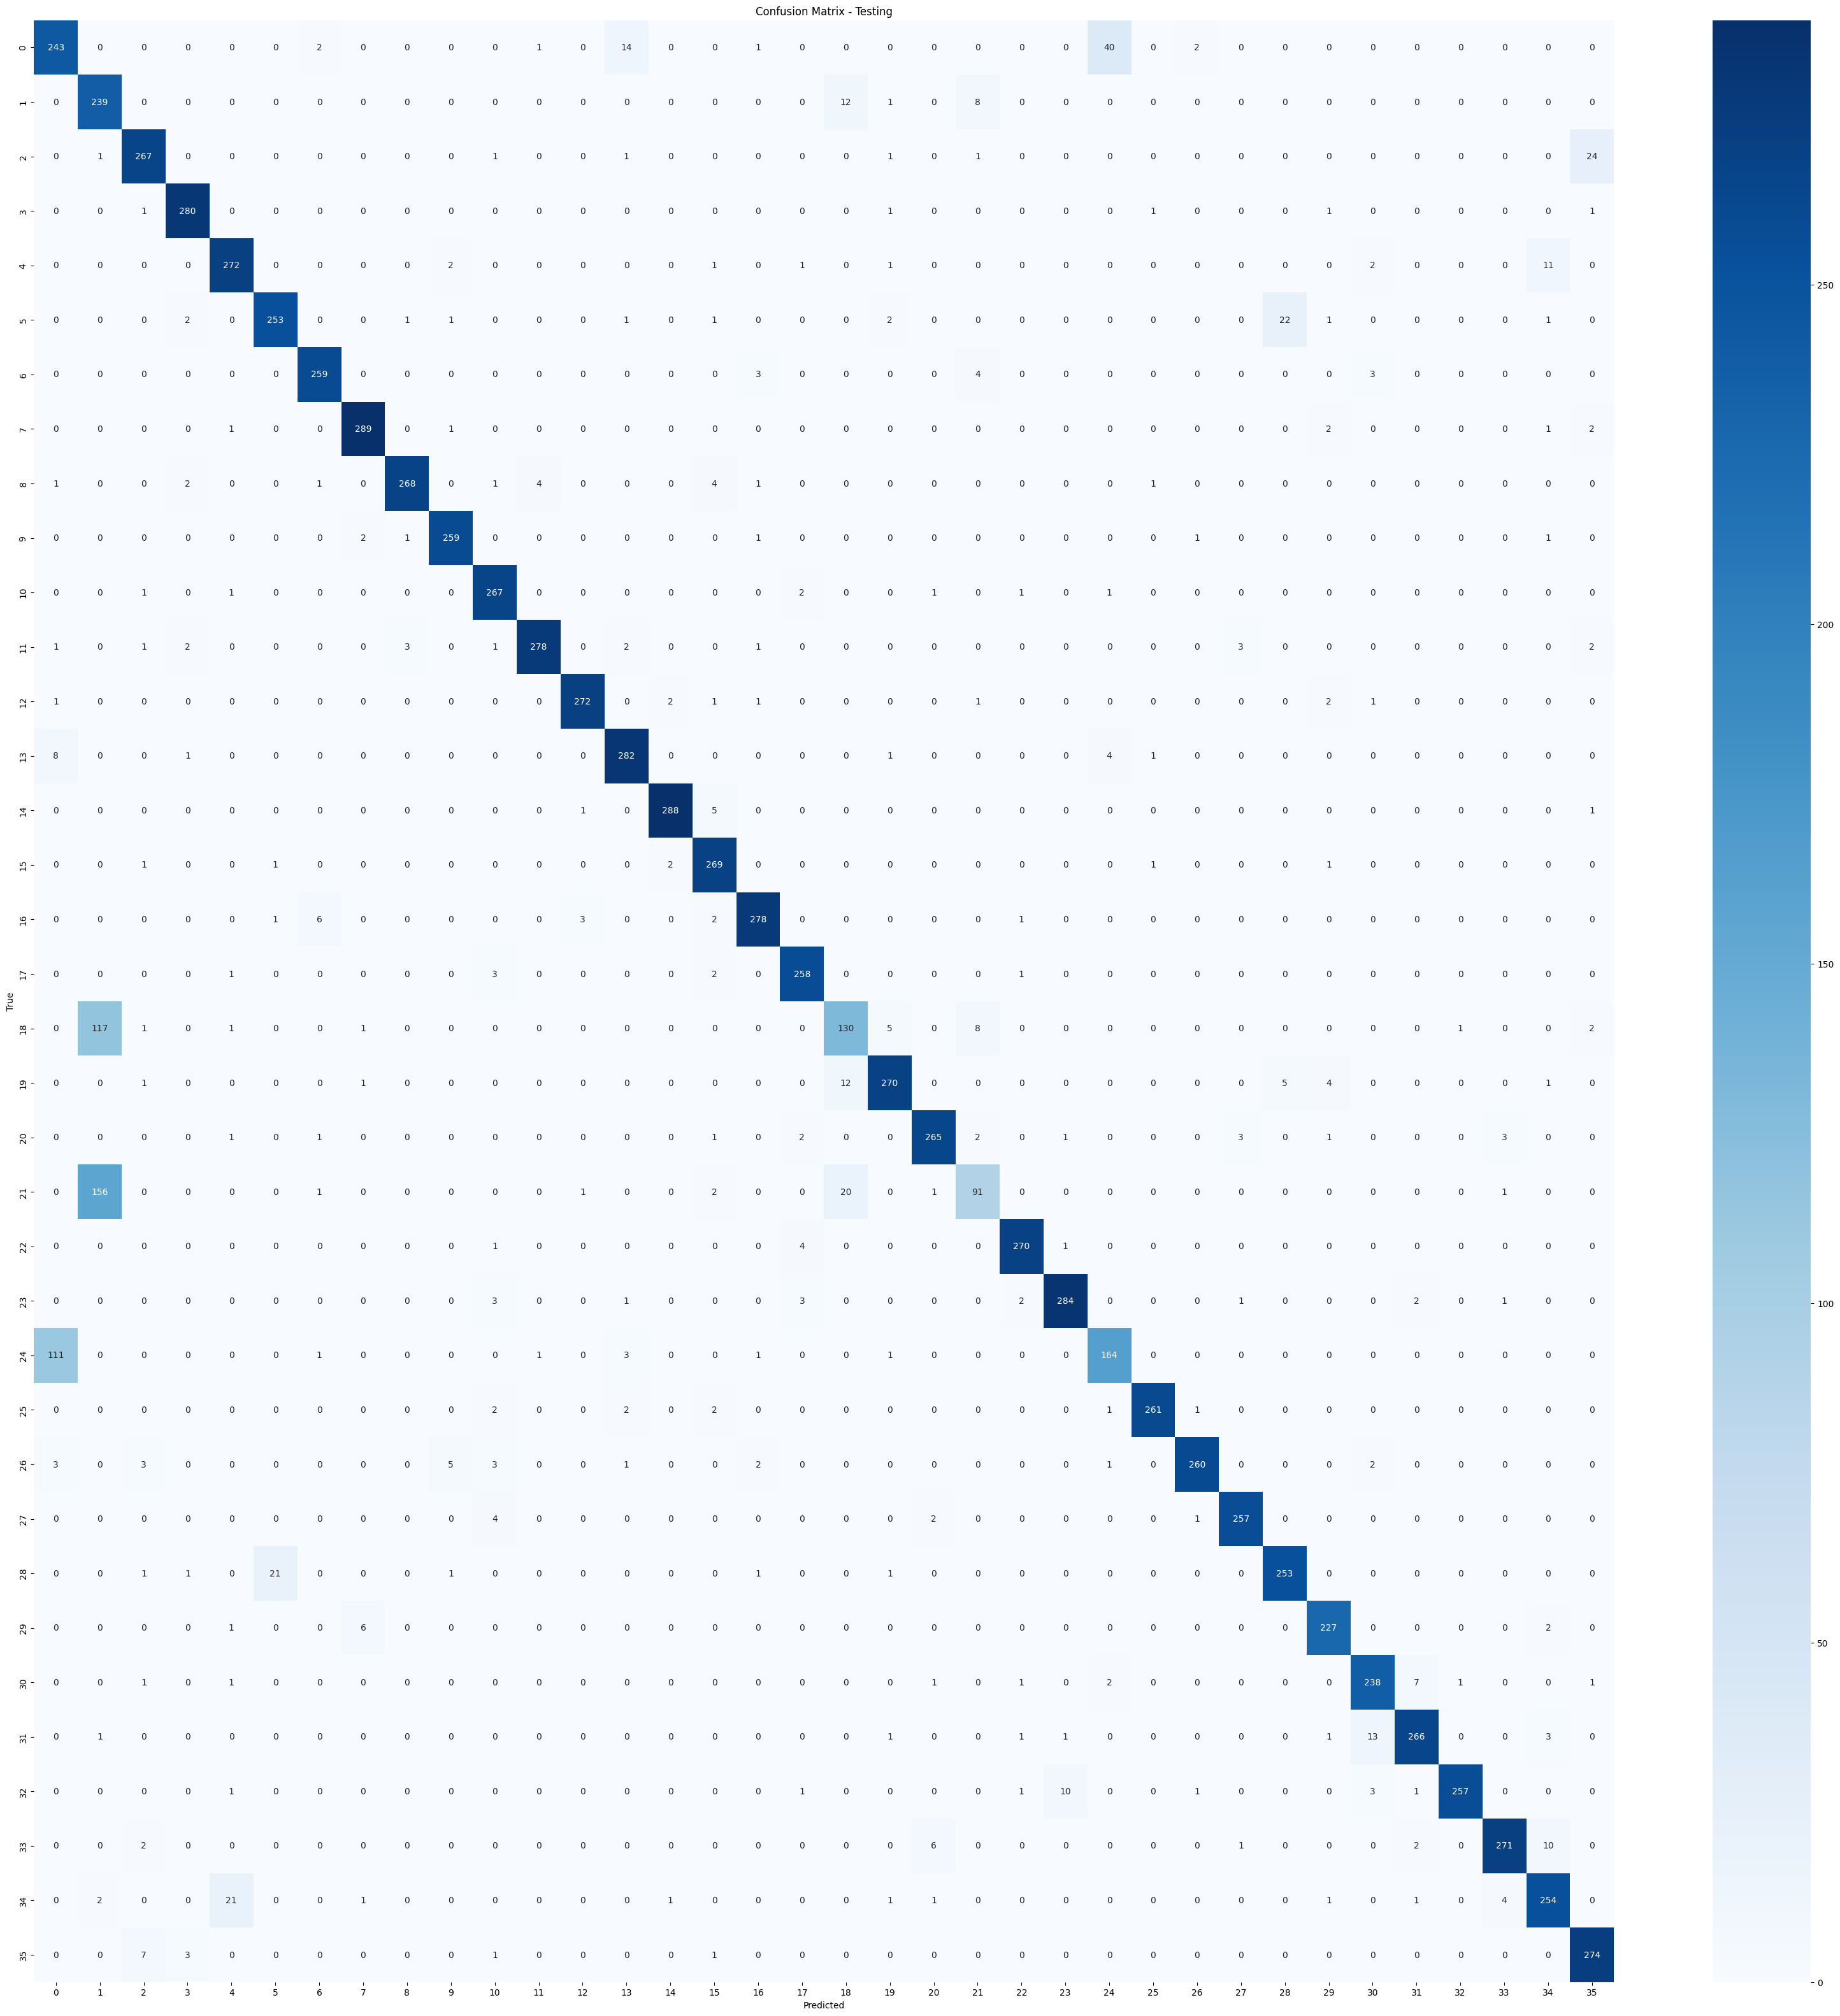

In [ ]:
'''
CONFUSION MATRIX - TESTING COMPONENT
'''

# Calculating the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Testing')
plt.show()

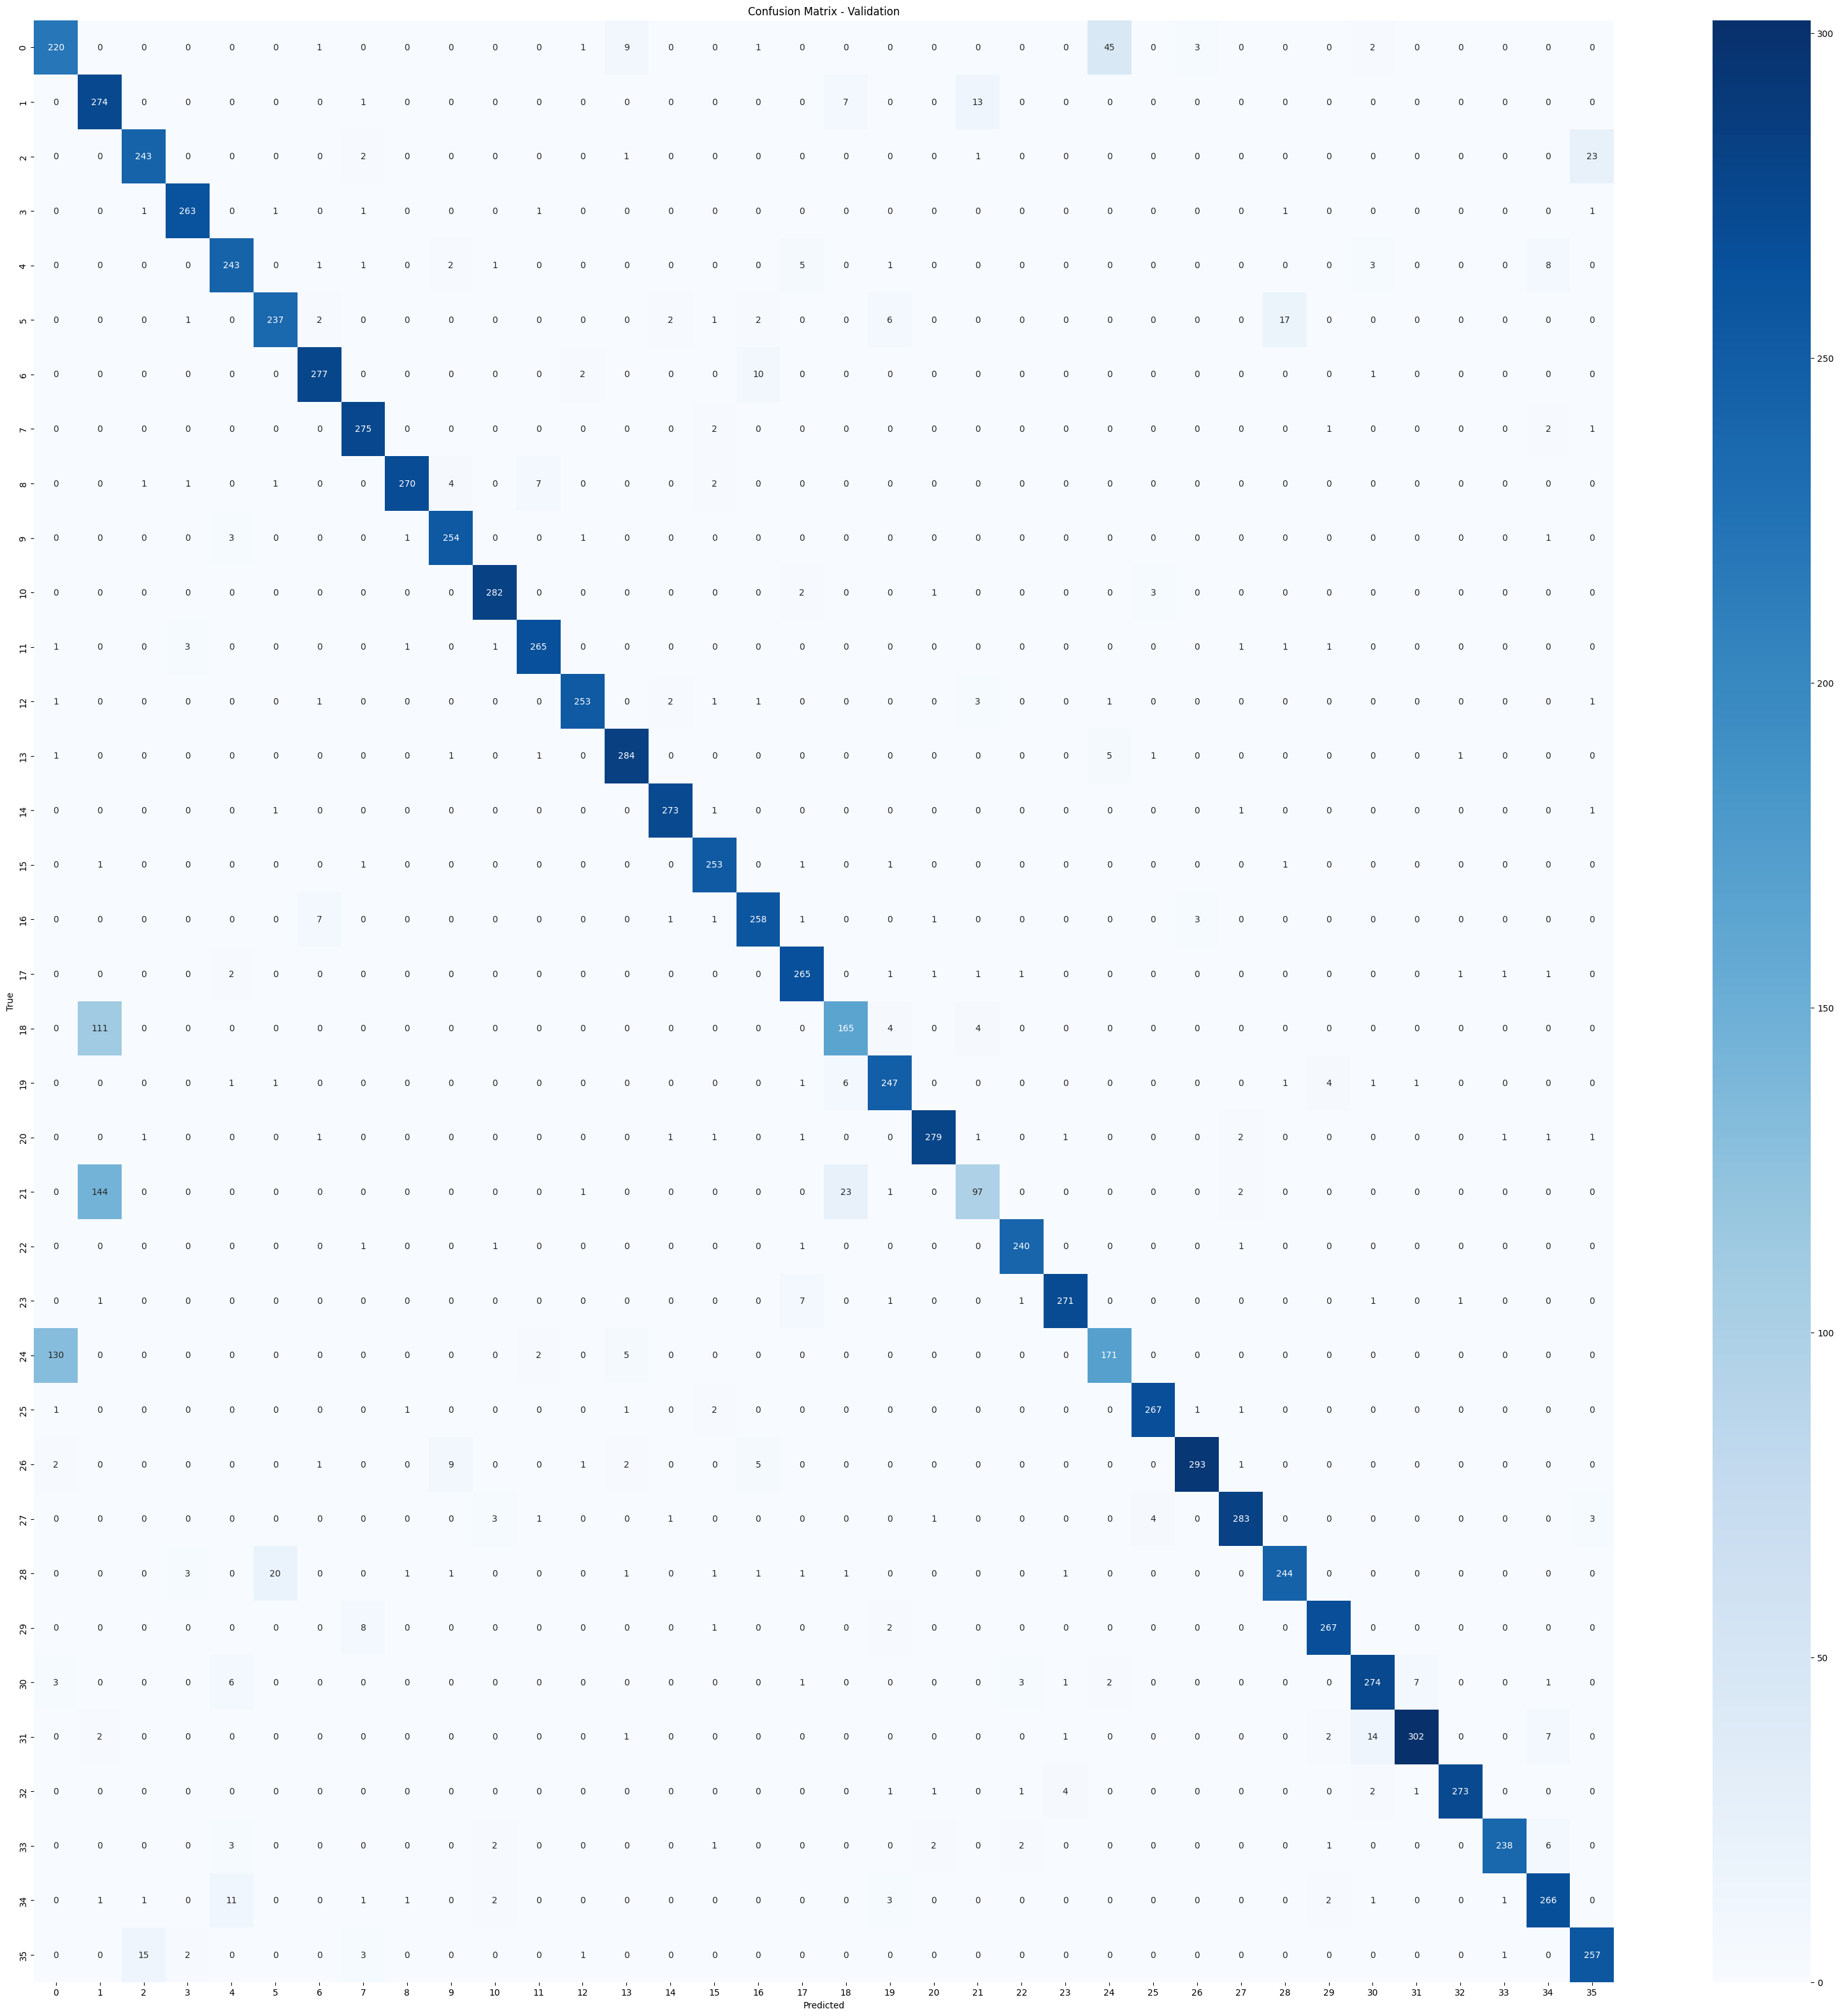

In [ ]:
'''
CONFUSION MATRIX - VALIDATION COMPONENT
'''

# Calculating the confusion matrix
cm = confusion_matrix(validation_true_labels, validation_predicted_labels)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation')
plt.show()

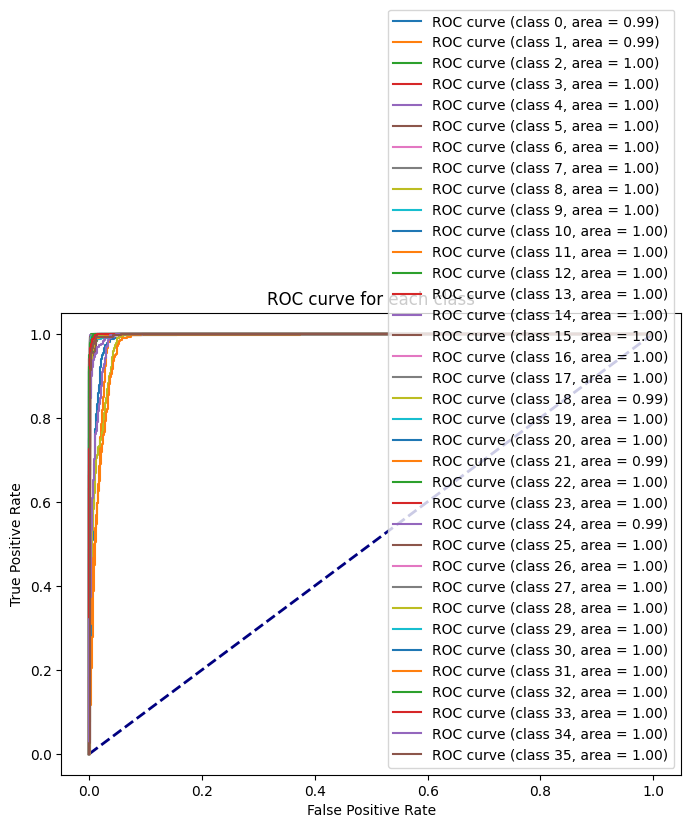

In [ ]:
'''
ROC Curve
'''

from sklearn.metrics import roc_curve, auc

# Setting the model to evaluation mode
model.eval()

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Lists to store the prediction values and labels
data_labels = []
value_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)  # Forward passing to get raw predictions
        pred_probs = F.softmax(outputs, dim=1)  # Applying softmax to get class probabilities
        value_preds.extend(pred_probs.cpu().numpy())  # Extending the list with predicted probabilities
        data_labels.extend(labels.cpu().numpy())  # Extending the list with true labels

# Converting the lists to NumPy arrays
predictions = np.array(value_preds)
labels = np.array(data_labels)

# Initializing arrays for storing false positive rate (fpr), true positive rate 
# (tpr), and area under the ROC curve (roc_auc)
for i in range(predictions.shape[1]):
    fpr[i], tpr[i], _ = roc_curve((labels == i).astype(int), predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve for each class
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
for i in range(predictions.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}, area = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for each class')
plt.legend(loc='lower right')
plt.show()


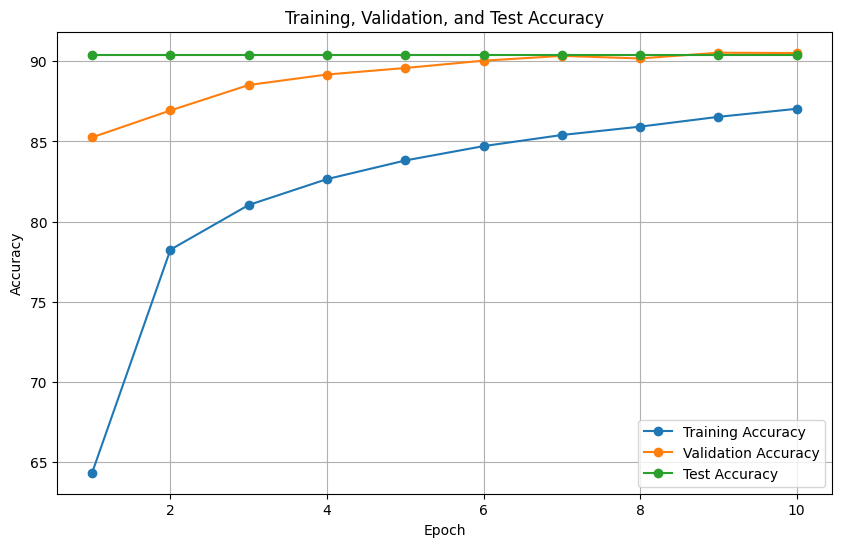

In [ ]:
'''
A graph that compares test, validation and training accuracy on the same plot 
with a clear labeling
'''

# Creating a list of epoch numbers
epochs = list(range(1, len(train_accuracies) + 1))

# Plotting training accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o', linestyle='-')

# Plotting validation accuracy
plt.plot(epochs, valid_accuracies, label='Validation Accuracy', marker='o', linestyle='-')

# Plotting test accuracy
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


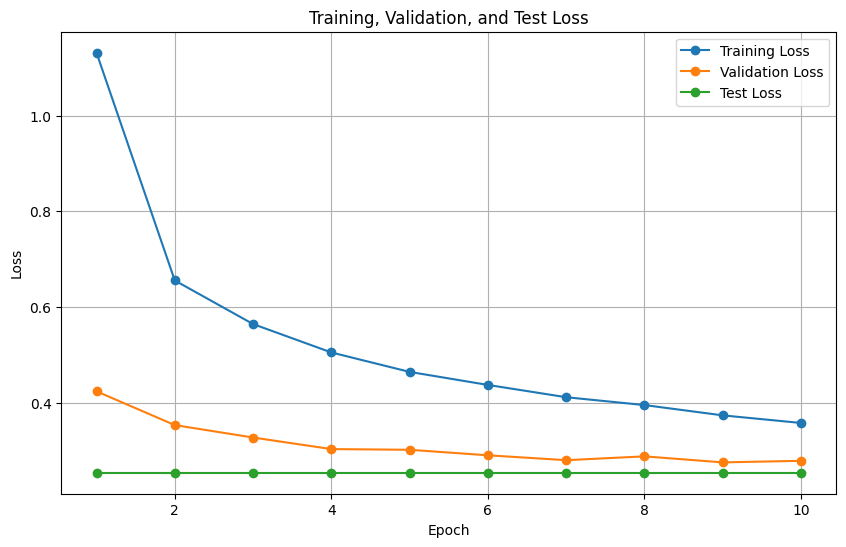

In [ ]:
'''
A graph that compares test, validation and training loss on the same plot with 
a clear labeling
'''

# Creating a list of epoch numbers
epochs = list(range(1, len(train_losses) + 1))

# Plotting training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', marker='o', linestyle='-')

# Plotting validation loss
plt.plot(epochs, valid_losses, label='Validation Loss', marker='o', linestyle='-')

# Plotting test loss
plt.plot(epochs, test_losses, label='Test Loss', marker='o', linestyle='-')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

#
# <br>
# <b>Part IV : VGG-11 Implementation

### <b>STEPS</b> :

1. Implement the VGG-11 (Version A) architecture following the proposed architecture. Be sure to use the same kernel sizes, stride, and padding as specified in the paper.

In [ ]:
class SelfVGG11(nn.Module):
    def __init__(self, num_classes=36):
        # Calling the constructor of the parent class (nn.Module)
        super(SelfVGG11, self).__init__()

        # Convolutional and pooling layers for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),
        )

        # Adaptive average pooling layer for adjusting to the input size
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layers for classification
        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),  # Fully connected layer with 512 input features and 4096 output features
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),  # Fully connected layer for the final output with 'num_classes' classes
            nn.Softmax(dim=1)  # Softmax activation for converting raw scores into probabilities
        )

    def forward(self, x):
        # Forward passing through the network
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)  # Flattenning the output tensor
        x = self.classifier(x)  # Classification using fully connected layers
        return x

In [ ]:
# Defining the mode

model = SelfVGG11()

In [ ]:
# Displaying the model architecture

print(model)

SelfVGG11(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=Fa

In [ ]:
# Printing the model summary - in a more specific manner

from torchsummary import summary

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
              ReLU-2           [-1, 64, 28, 28]               0
         MaxPool2d-3           [-1, 64, 15, 15]               0
            Conv2d-4          [-1, 128, 15, 15]          73,856
              ReLU-5          [-1, 128, 15, 15]               0
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
              ReLU-8            [-1, 256, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         590,080
             ReLU-10            [-1, 256, 8, 8]               0
        MaxPool2d-11            [-1, 256, 5, 5]               0
           Conv2d-12            [-1, 512, 5, 5]       1,180,160
             ReLU-13            [-1, 512, 5, 5]               0
           Conv2d-14            [-1, 51

##
#### 2. Train the model on a dataset used in Part III (EMNIST)

In [ ]:
# Defining the dataset and dataloaders for training, validation, and testing

# The model shall only accept single channel, thus need to reshape
# accordingly
X_train = X_train.reshape(80641, 1, 28, 28)
X_valid = X_valid.reshape(10079, 1, 28, 28)
X_test = X_test.reshape(10080, 1, 28, 28)


train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
valid_dataset = TensorDataset(torch.from_numpy(X_valid).float(), torch.from_numpy(y_valid).float())
test_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
# Defining the model, loss function, and optimizer

model = SelfVGG11()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Early stopping parameters

num_epochs = 200
patience = 200

In [ ]:
# Learning rate scheduler

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

In [ ]:
# Initializing variables to track the best model and validation loss

best_model = None
best_valid_loss = float('inf')

In [ ]:
# Lists to store losses and accuracies

train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

In [ ]:
train_predicted_labels = []
train_true_labels = []
validation_predicted_labels = []
validation_true_labels = []

for epoch in range(num_epochs):
    # Training loop
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_predicted_labels = []
    train_true_labels = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        labels = labels.to(torch.int64)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_predicted_labels.extend(predicted.cpu().numpy())
        train_true_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    validation_predicted_labels = []
    validation_true_labels = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

            validation_predicted_labels.extend(predicted.cpu().numpy())
            validation_true_labels.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(valid_loader)
    valid_accuracy = 100 * correct_valid / total_valid

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Valid Loss: {valid_loss:.4f} - Train Acc: {train_accuracy:.2f}% - Valid Acc: {valid_accuracy:.2f}%")

    # Storing losses and accuracies for later analysis
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    # Learning rate scheduler
    scheduler.step(valid_loss)

    # Checking if the current model has the best validation loss
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_model = model.state_dict()
    else:
        # Implementing early stopping if the validation loss increases for a certain number of epochs
        patience -= 1
        if patience == 0:
            print("Early stopping. Restoring the best model.")
            model.load_state_dict(best_model)
            break

Epoch 1/10 - Train Loss: 3.5836 - Valid Loss: 3.5835 - Train Acc: 2.81% - Valid Acc: 2.76%
Epoch 2/10 - Train Loss: 3.5835 - Valid Loss: 3.5836 - Train Acc: 2.83% - Valid Acc: 2.76%


KeyboardInterrupt: 

<br>
<br>
3. Evaluate the performance of the model on the testing data. Suggested metrics:<br>
• Time to train<br>
• Accuracy <br>
• Precision, recall and F1 score.

In [ ]:
# Lists to store testing losses and accuracies

test_losses = []
test_accuracies = []
precision, recall, f1, _ = [], [], [], []

In [ ]:
# Initializing lists to store predicted and true labels for the test set

test_predicted_labels = []
test_true_labels = []

for epoch in range(10):
    start_time = time.time()  # Recording the start time for performance tracking
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0
    test_predicted_labels = []  # Resetting lists for each epoch
    test_true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.float())
            labels = labels.to(torch.int64)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

            # Storing predicted and true labels for later analysis
            test_predicted_labels.extend(predicted.cpu().numpy())
            test_true_labels.extend(labels.cpu().numpy())

    test_loss = running_test_loss / len(test_loader)  # Calculating average test loss
    test_accuracy = 100 * correct_test / total_test  # Calculating test accuracy
    precision_epoch, recall_epoch, f1_epoch, _ = precision_recall_fscore_support(test_true_labels, test_predicted_labels, average='weighted')

    # Storing test metrics for later analysis
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    precision.append(precision_epoch)
    recall.append(recall_epoch)
    f1.append(f1_epoch)

    elapsed_time = time.time() - start_time  # Calculating elapsed time for the current epoch

    print(f"Epoch {epoch+1}/10 - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.2f}% - Precision: {precision_epoch:.4f} - Recall: {recall_epoch:.4f} - F1: {f1_epoch:.4f} - Time: {elapsed_time:.2f} seconds")


Epoch 1/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 4.06 seconds
Epoch 2/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 3.97 seconds
Epoch 3/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 4.04 seconds
Epoch 4/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 3.95 seconds
Epoch 5/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 4.00 seconds
Epoch 6/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 3.99 seconds
Epoch 7/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 4.09 seconds
Epoch 8/10 - Test Loss: 0.2601 - Test Acc: 89.59% - Precision: 0.9067 - Recall: 0.8959 - F1: 0.8927 - Time: 4.05 seconds
Epoch 9/10 - Test Loss: 0.2601 -

In [ ]:
# Printing the final results for the 10th epoch

print("Final Results:")
print(f"Test Loss: {test_losses[-1]:.4f}")
print(f"Test Accuracy: {test_accuracies[-1]:.2f}%")
print(f"Precision: {precision[-1]:.4f}")
print(f"Recall: {recall[-1]:.4f}")
print(f"F1 Score: {f1[-1]:.4f}")

Final Results:
Test Loss: 0.2601
Test Accuracy: 89.59%
Precision: 0.9067
Recall: 0.8959
F1 Score: 0.8927


In [ ]:
import h5py

# Save the model's state dictionary to a .pt file
torch.save(model.state_dict(), 'soubhiks_shirisha_assignment2_part4.pt')

# Convert the .pt file to an .h5 file
pt_weights = torch.load('soubhiks_shirisha_assignment2_part4.pt')
with h5py.File('soubhiks_shirisha_assignment2_part4.h5', 'w') as f:
    for key in pt_weights:
        f.create_dataset(key, data=pt_weights[key].cpu().numpy())

<br>
<br>
4. Visualize the results. Include the graphs you defined in Part III, Step 10.

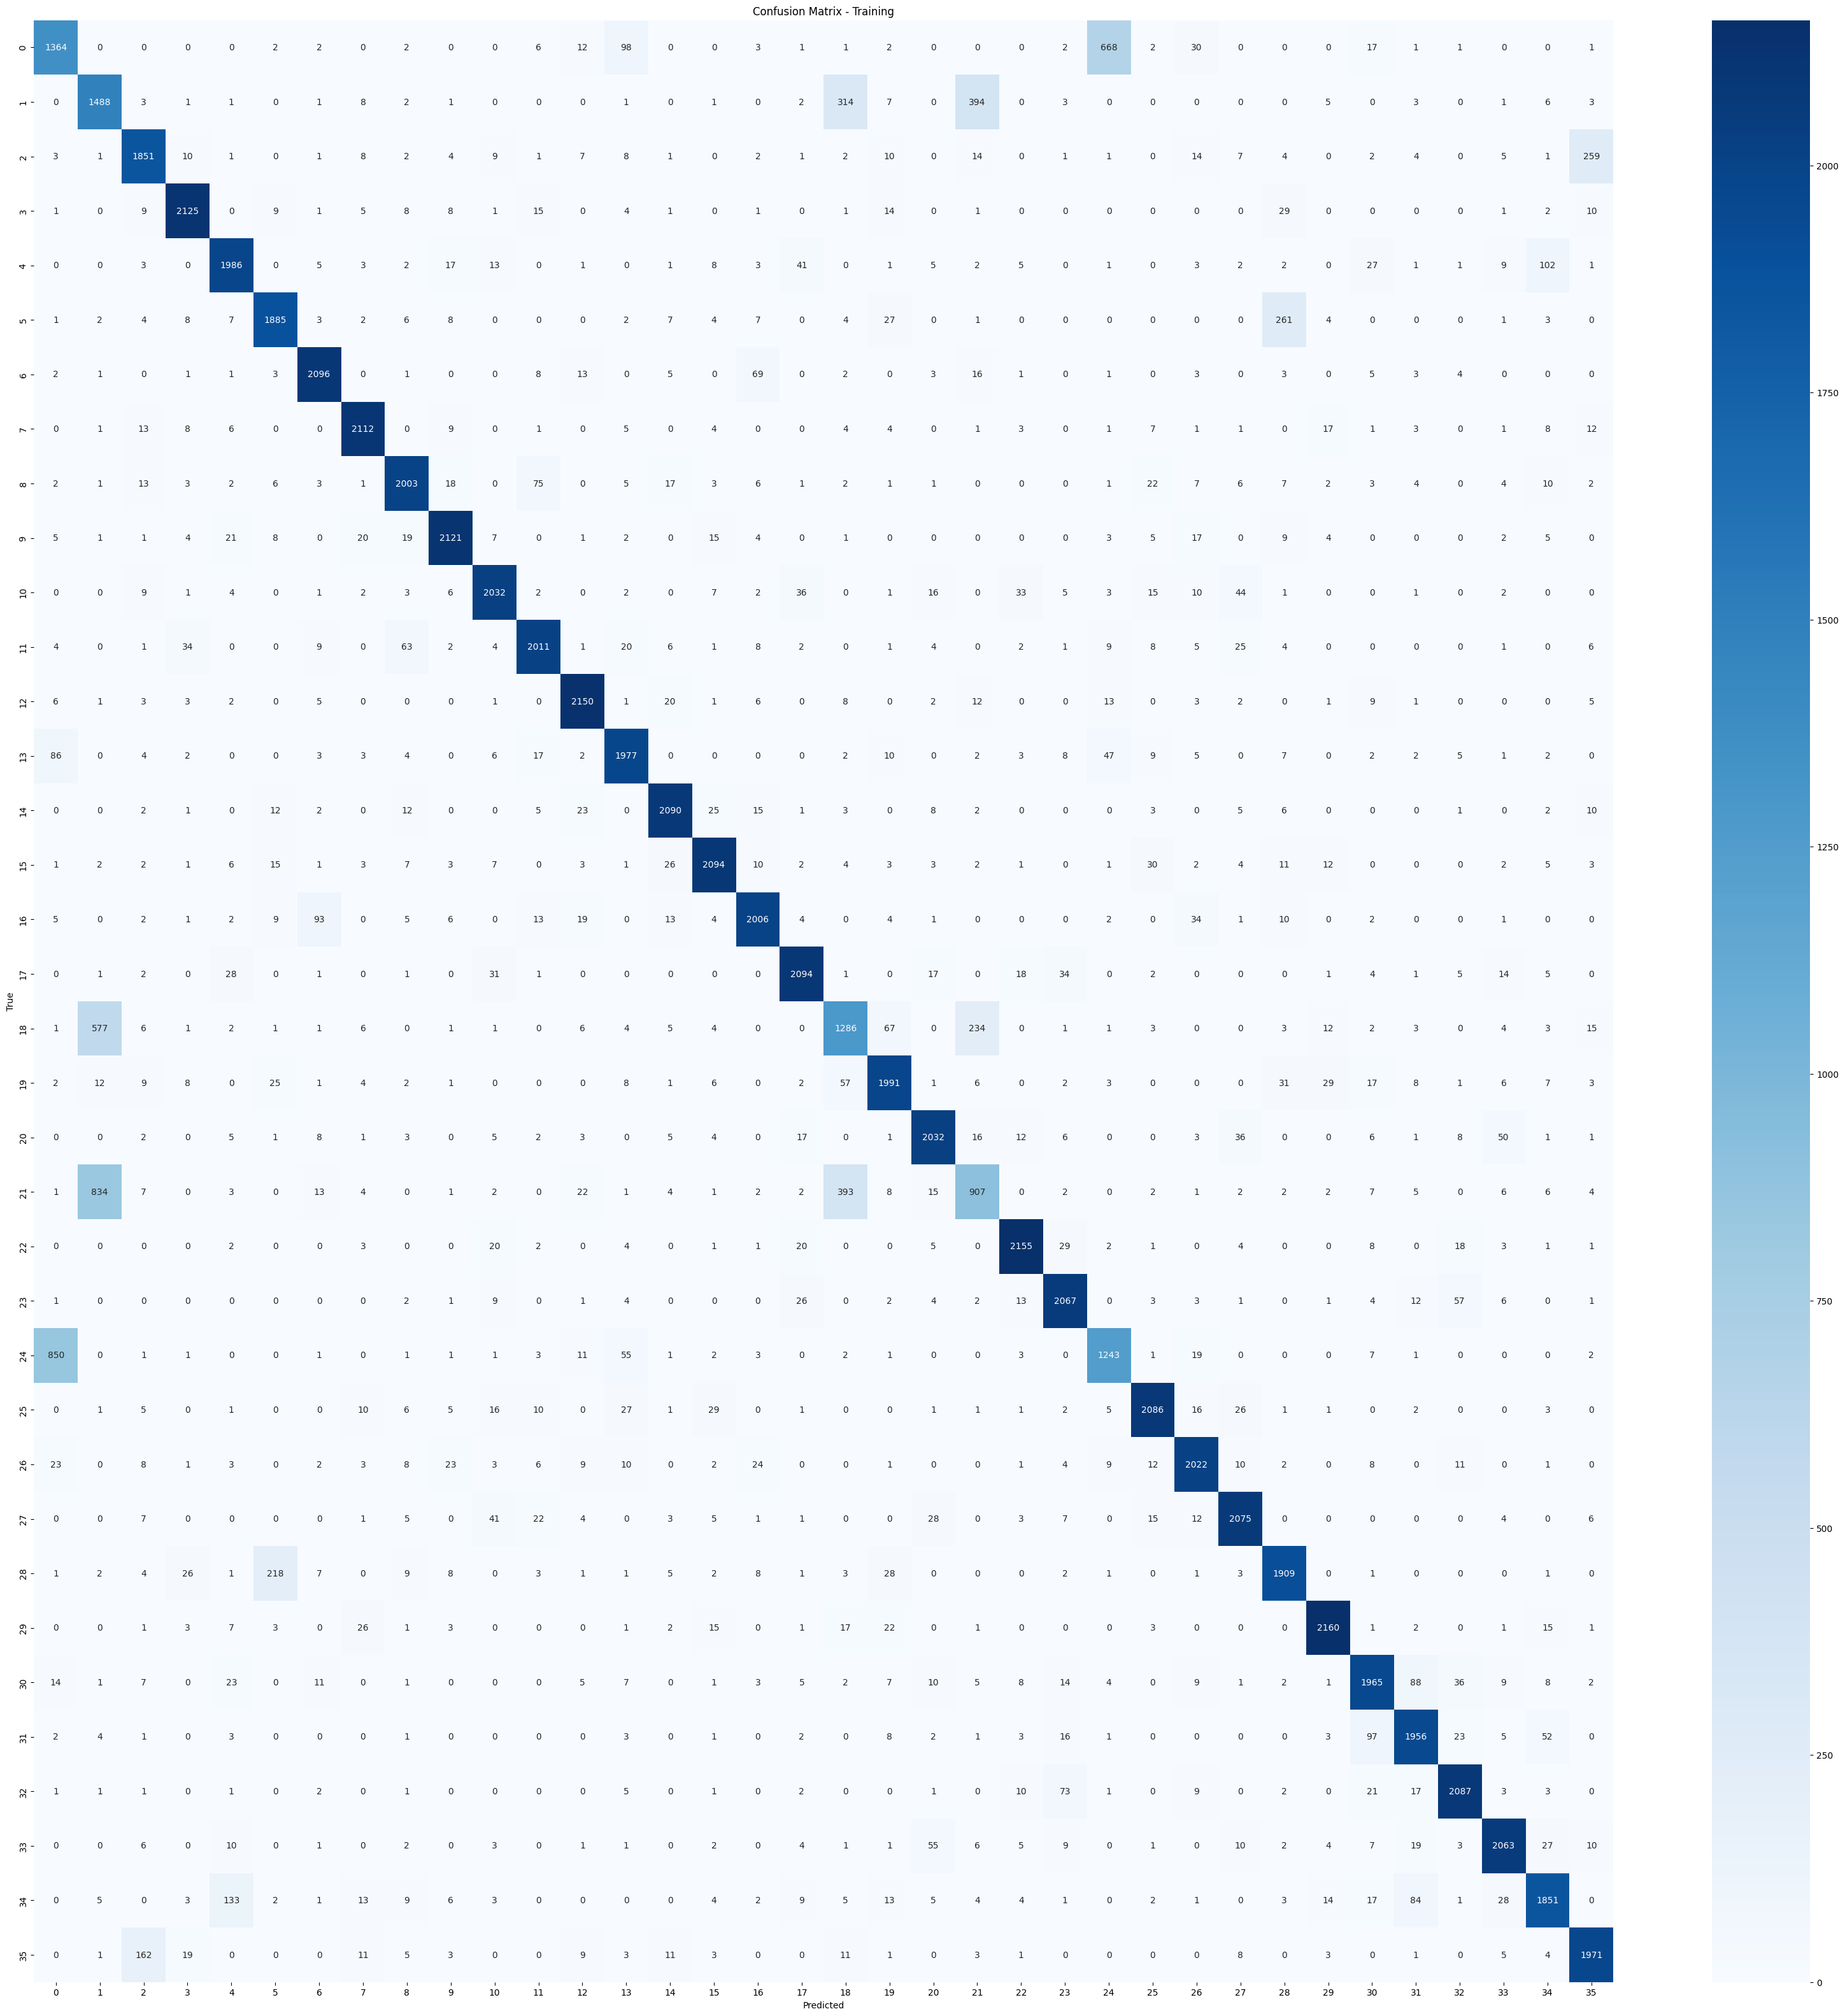

In [ ]:
'''
CONFUSION MATRIX - TRAINING COMPONENT
'''

# Calculating the confusion matrix
cm = confusion_matrix(train_true_labels, train_predicted_labels)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training')
plt.show()

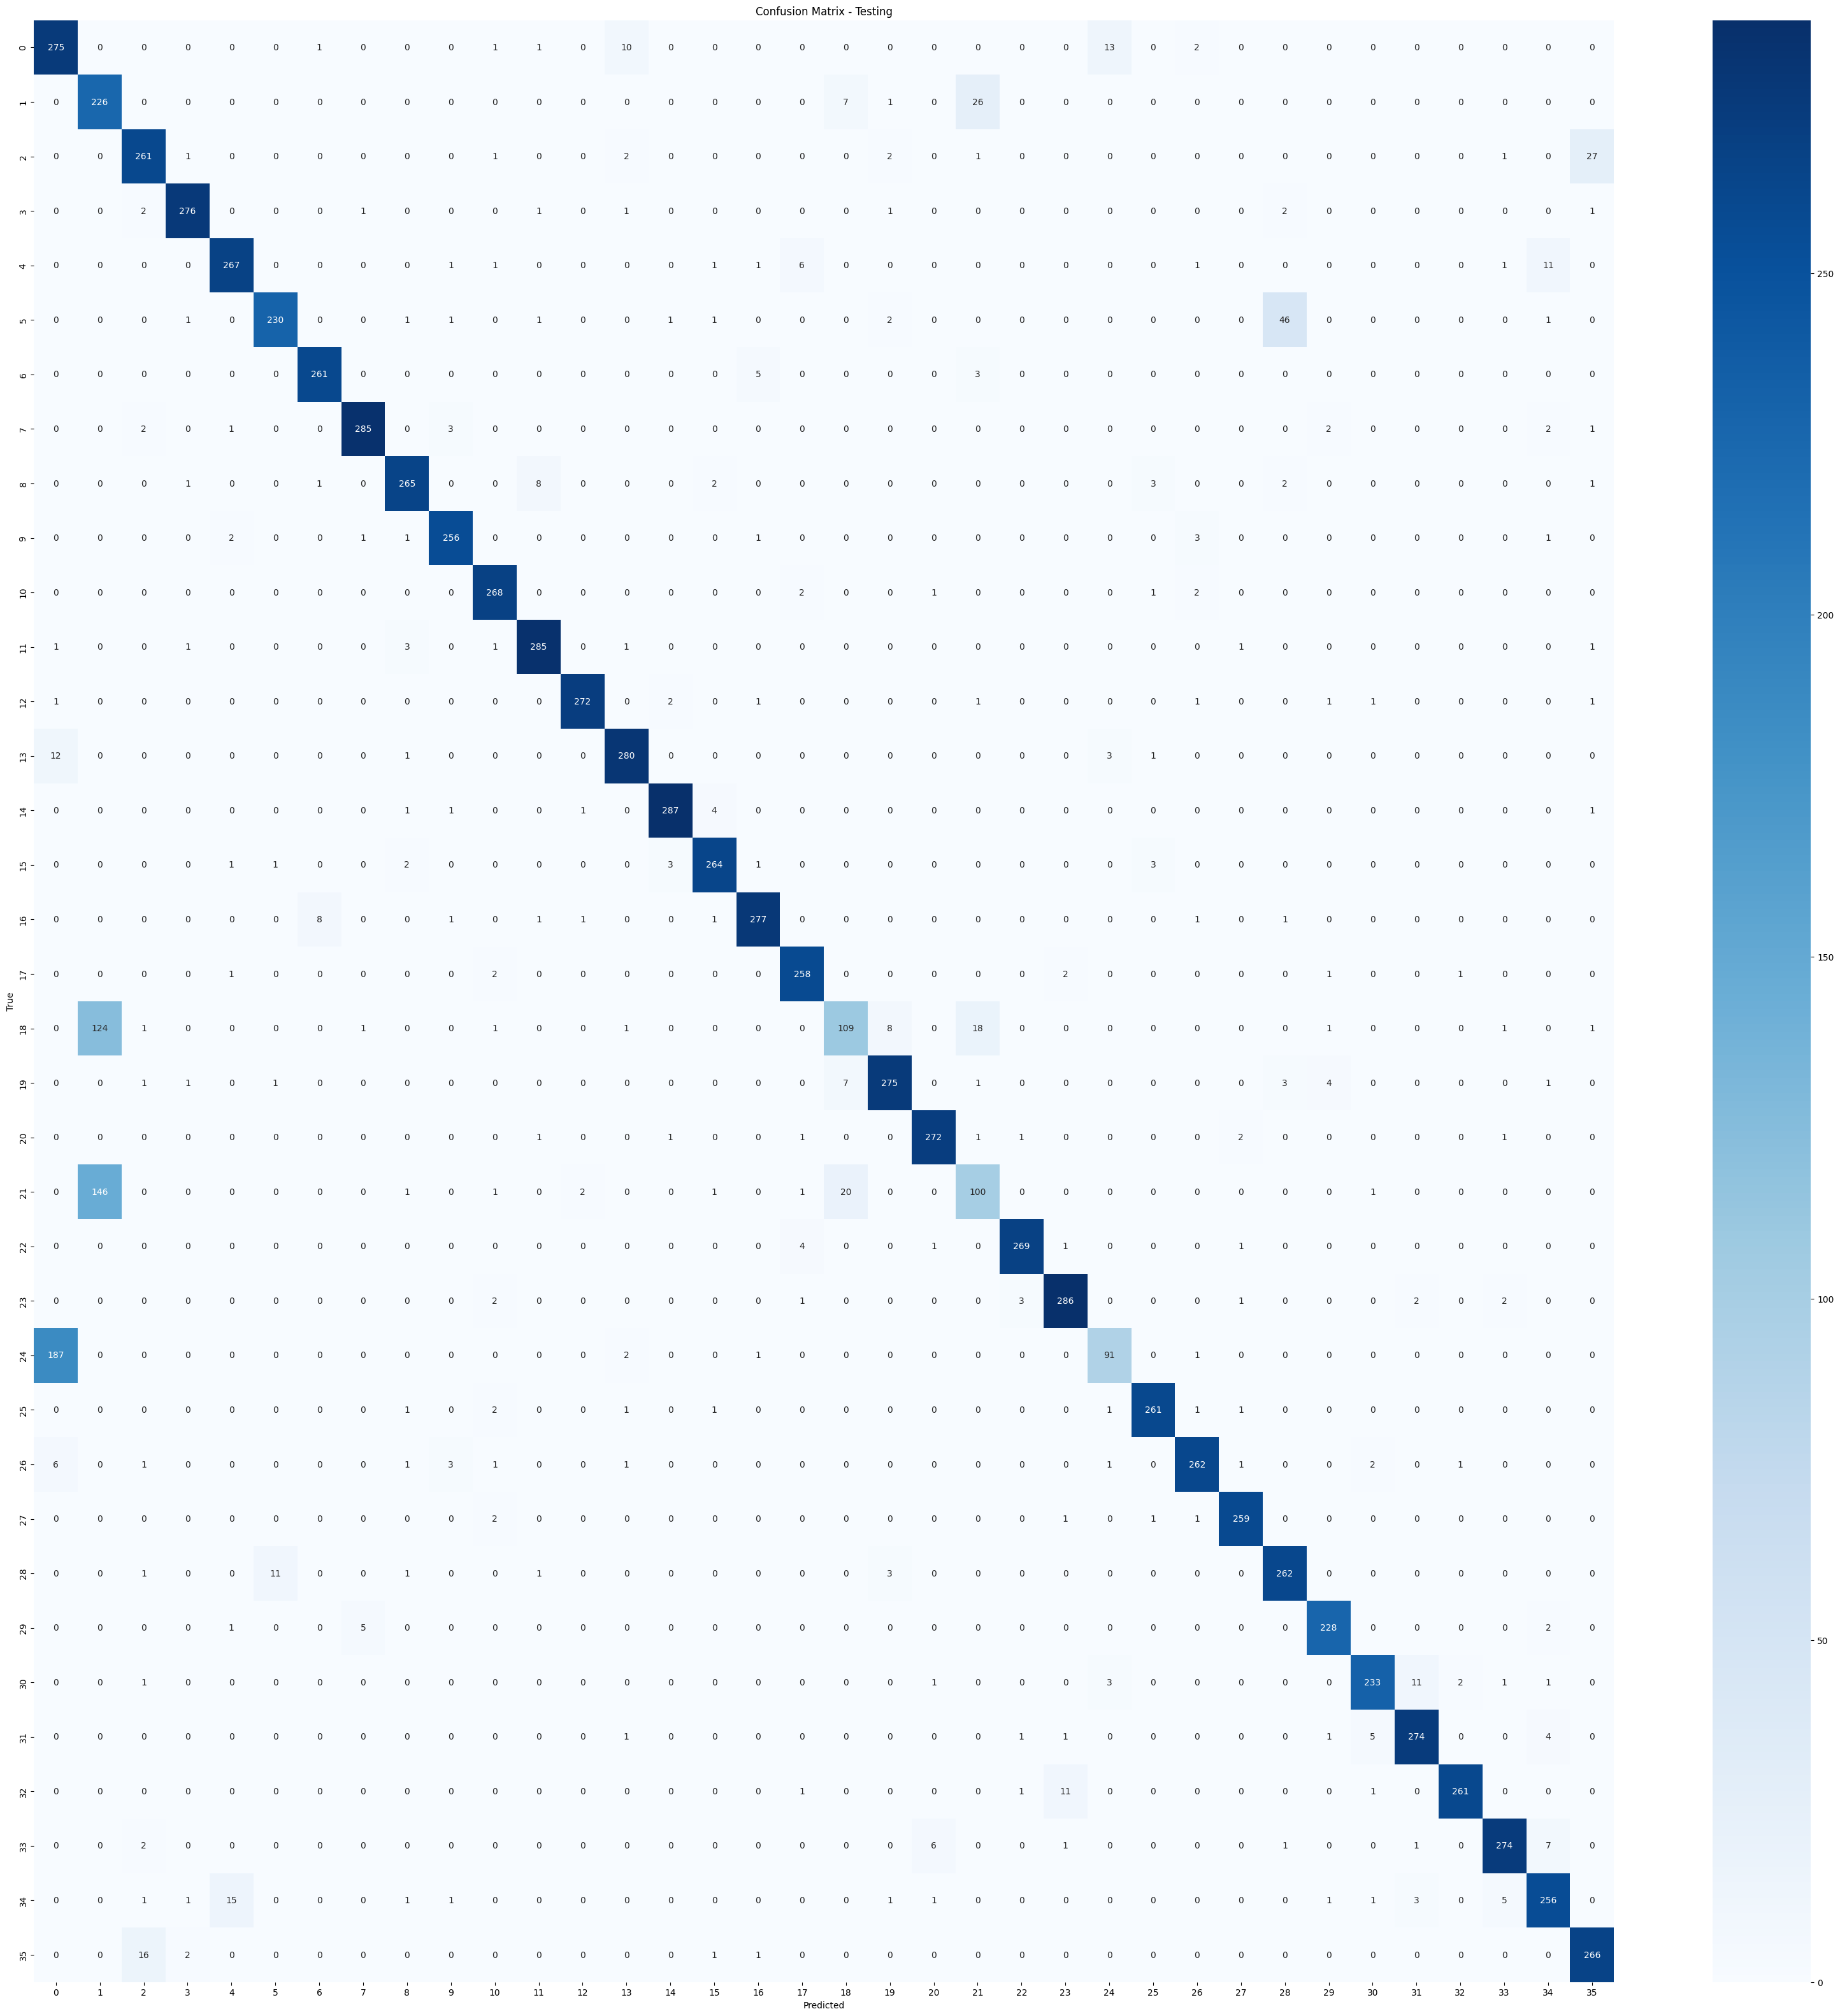

In [ ]:
'''
CONFUSION MATRIX - TESTING COMPONENT
'''

# Calculating the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Testing')
plt.show()

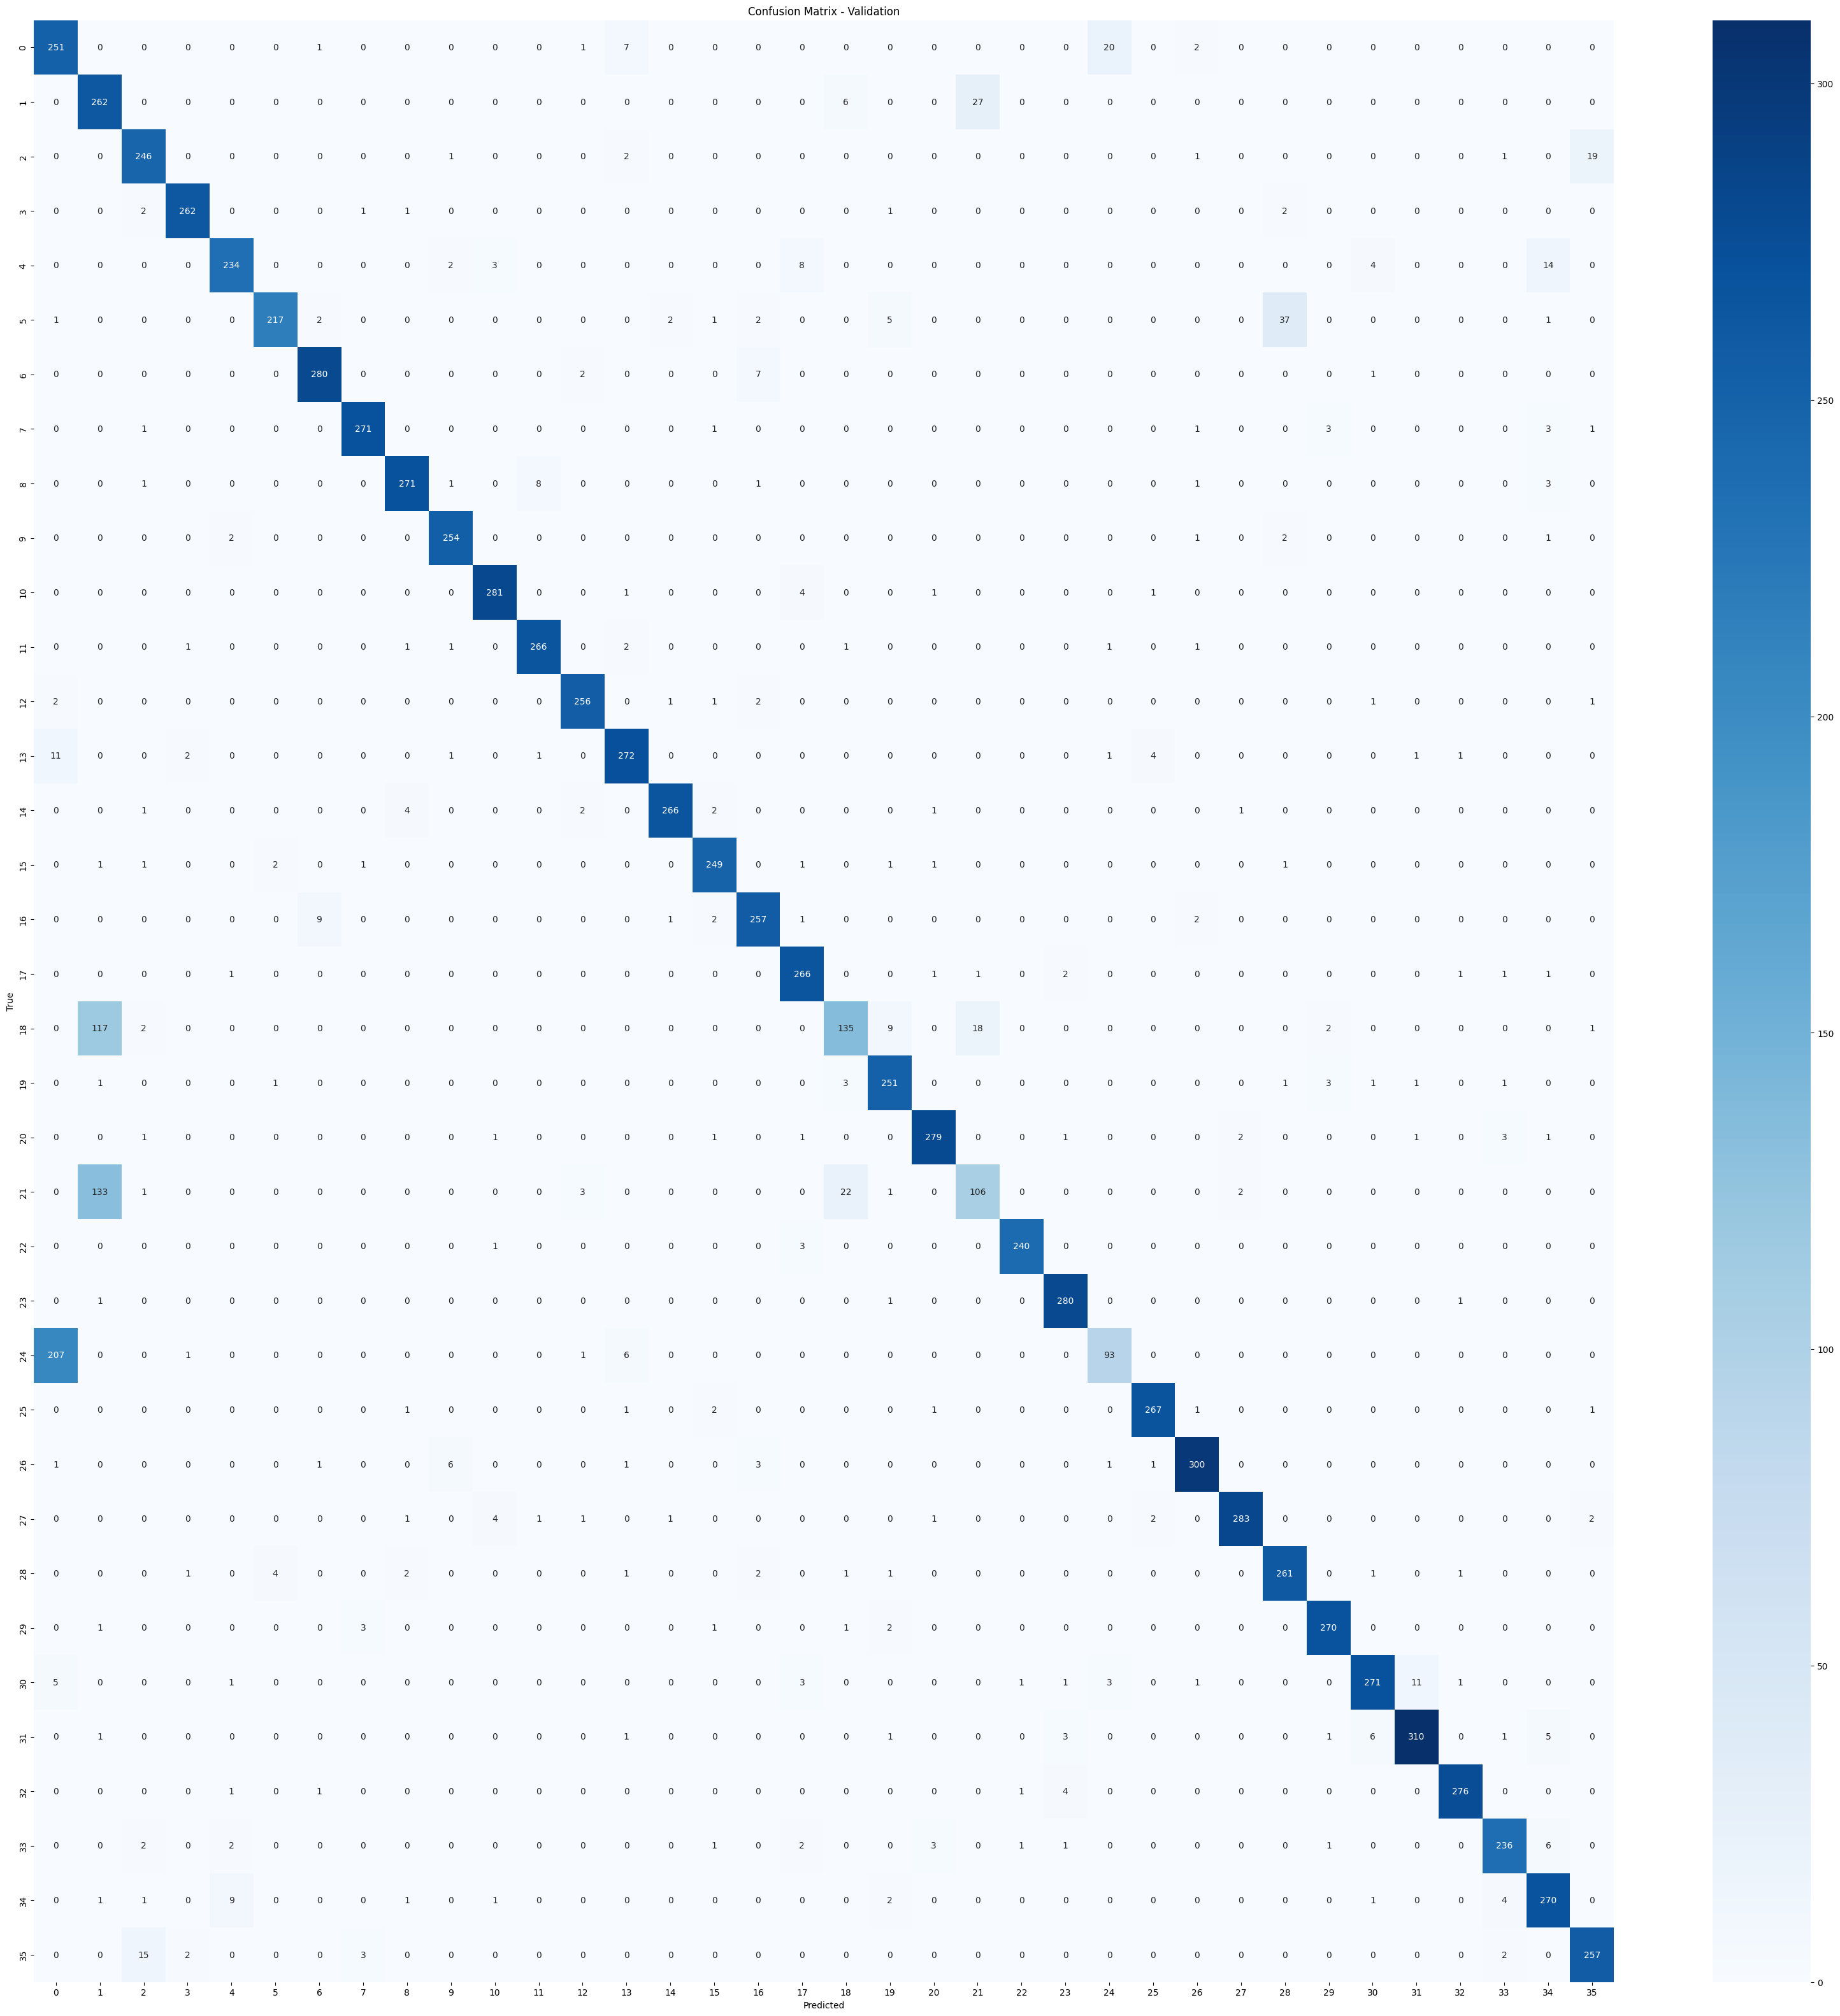

In [ ]:
'''
CONFUSION MATRIX - VALIDATION COMPONENT
'''

# Calculating the confusion matrix
cm = confusion_matrix(validation_true_labels, validation_predicted_labels)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation')
plt.show()

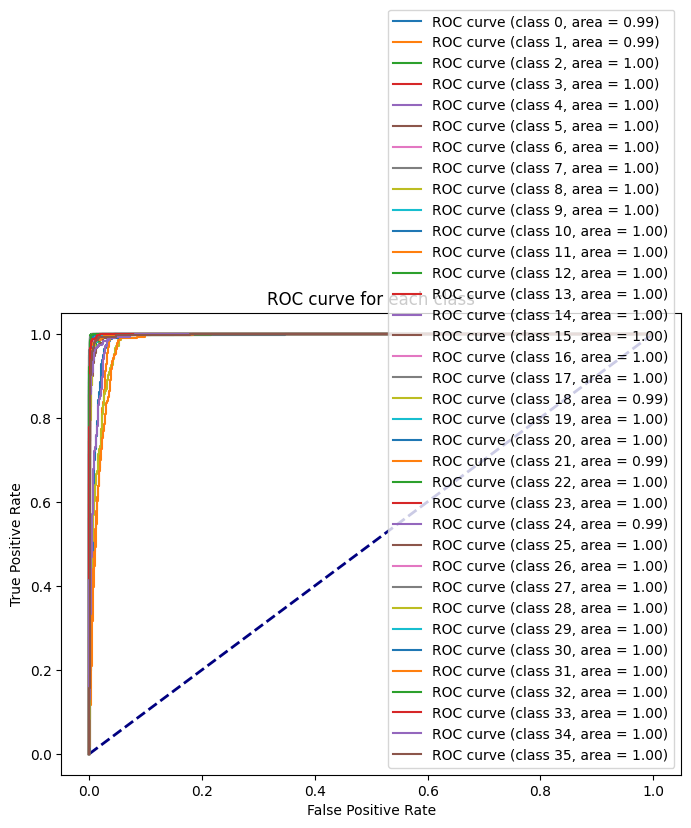

In [ ]:
'''
ROC Curve
'''

from sklearn.metrics import roc_curve, auc

# Setting the model to evaluation mode
model.eval()

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Lists to store the prediction values and labels
data_labels = []
value_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        pred_probs = F.softmax(outputs, dim=1)
        value_preds.extend(pred_probs.cpu().numpy())
        data_labels.extend(labels.cpu().numpy())

predictions = np.array(value_preds)
labels = np.array(data_labels)

for i in range(predictions.shape[1]):
    fpr[i], tpr[i], _ = roc_curve((labels == i).astype(int), predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve for each class
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
for i in range(predictions.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}, area = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for each class')
plt.legend(loc='lower right')
plt.show()


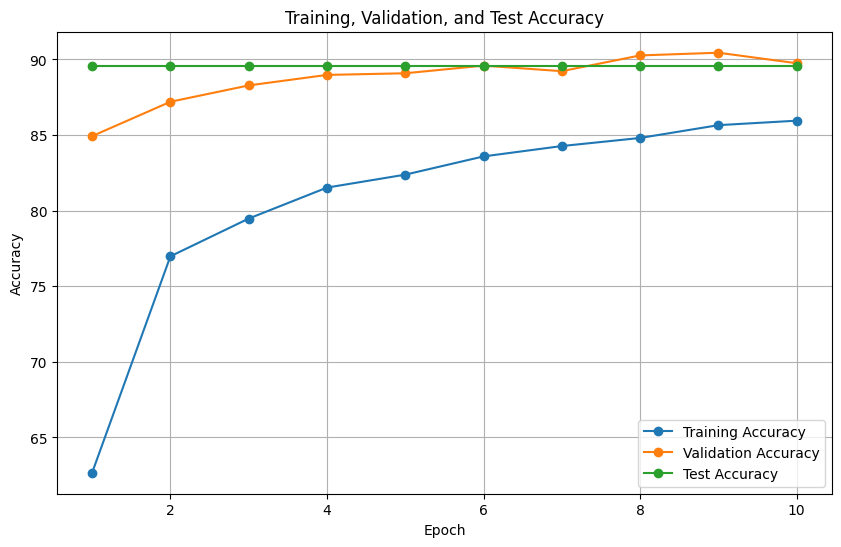

In [ ]:
'''
A graph that compares test, validation and training accuracy on the same plot 
with a clear labeling
'''

# Creating a list of epoch numbers
epochs = list(range(1, len(train_accuracies) + 1))

# Plotting training accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o', linestyle='-')

# Plotting validation accuracy
plt.plot(epochs, valid_accuracies, label='Validation Accuracy', marker='o', linestyle='-')

# Plotting test accuracy
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

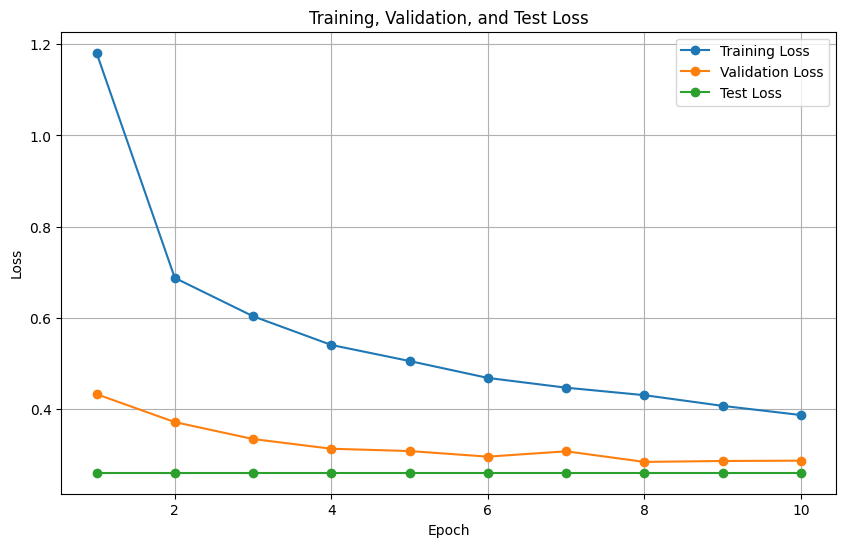

In [ ]:
'''
A graph that compares test, validation and training loss on the same plot with 
a clear labeling
'''

# Creating a list of epoch numbers
epochs = list(range(1, len(train_losses) + 1))

# Plotting training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', marker='o', linestyle='-')

# Plotting validation loss
plt.plot(epochs, valid_losses, label='Validation Loss', marker='o', linestyle='-')

# Plotting test loss
plt.plot(epochs, test_losses, label='Test Loss', marker='o', linestyle='-')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.grid(True)
plt.show()